# **Unsupervised Machine Learning: Scouting Football Player**


## Tabel of Contents
* [**1. Objective**](#OBJ)
* [**2. Data Preprocessing**](#DATA)
    * [**2.1  About the Dataset**](#DATADESC)
    * [**2.2 Data Filtering**](#FILTER)
    * [**2.3 Data Cleaning**](#CLEANING)
    * [**2.4 Feature Engineering**](#FEATURE)
    * [**2.5 Centering and Scaling**](#CENTRE)
* [**3. Explatory Data Analysis**](#DATA)
* [**4. Principal Component Analysis PCA**](#PCA)
* [**5. K-Means Clustering**](#KM)
    * [**5.1  Euclidian Distance for Ranking**](#KM_DIST)
* [**6. DBSCAN**](#DBSCAN)
* [**7. Mean Shift Clustering**](#MEANSHIFT)
    * [**7.1 Analysis of Mean Shift Clustering**](#MEAN_ANAL) 


# 1. Objective <a class="anchor" id="OBJ"></a>


Arsenal football clubs have scout networks and resources to screen through data in identifying the players that they need before negotiation with the players and the selling clubs. Here, I would like to present the best unsupervised machine learning model to search types of players and categorize it. 

In this case, we will try find the replacement for midfielders players that will replace the old players like Jorginho and Thomas Partey where both of them are known for their playmaking and ball control in central areas.

***


# 2. Data Preprocessing <a class="anchor" id="DATA"></a>

### Importing Required Libraries 


In [172]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.metrics import pairwise_distances
%matplotlib inline

### 2.1 About the Dataset <a class="anchor" id="DATADESC"></a>

The datasets found on Kaggle by Vivo Vinco: [2022-2023 European Leagues Player Stats](https://www.kaggle.com/datasets/vivovinco/20222023-football-player-stats). This dataset contains 2022-2023 football player stats per 90 minutes. Only players of the Premier League, Ligue 1, Bundesliga, Serie A, and La Liga are listed.

There are over 2500 rows and 124 columns. The columns' descriptions are listed below:

#### Player Information
- **Rk**: Rank
- **Player**: Player's name
- **Nation**: Player's nation
- **Pos**: Position
- **Squad**: Squad’s name
- **Comp**: League that squad occupies
- **Age**: Player's age
- **Born**: Year of birth

#### Match Information
- **MP**: Matches played
- **Starts**: Matches started
- **Min**: Minutes played
- **90s**: Minutes played divided by 90

#### Goals and Shots
- **Goals**: Goals scored or allowed
- **Shots**: Shots total (Does not include penalty kicks)
- **SoT**: Shots on target (Does not include penalty kicks)
- **SoT%**: Shots on target percentage (Does not include penalty kicks)
- **G/Sh**: Goals per shot
- **G/SoT**: Goals per shot on target (Does not include penalty kicks)
- **ShoDist**: Average distance, in yards, from the goal of all shots taken (Does not include penalty kicks)
- **ShoFK**: Shots from free kicks
- **ShoPK**: Penalty kicks made
- **PKatt**: Penalty kicks attempted

#### Passing
- **PasTotCmp**: Passes completed
- **PasTotAtt**: Passes attempted
- **PasTotCmp%**: Pass completion percentage
- **PasTotDist**: Total distance, in yards, that completed passes have traveled in any direction
- **PasTotPrgDist**: Total distance, in yards, that completed passes have traveled towards the opponent's goal
- **PasShoCmp**: Passes completed (5-15 yards)
- **PasShoAtt**: Passes attempted (5-15 yards)
- **PasShoCmp%**: Pass completion percentage (5-15 yards)
- **PasMedCmp**: Passes completed (15-30 yards)
- **PasMedAtt**: Passes attempted (15-30 yards)
- **PasMedCmp%**: Pass completion percentage (15-30 yards)
- **PasLonCmp**: Passes completed (longer than 30 yards)
- **PasLonAtt**: Passes attempted (longer than 30 yards)
- **PasLonCmp%**: Pass completion percentage (longer than 30 yards)
- **Assists**: Assists
- **PasAss**: Passes that directly lead to a shot (assisted shots)
- **Pas3rd**: Completed passes that enter the final third of the pitch
- **PPA**: Completed passes into the 18-yard box
- **CrsPA**: Completed crosses into the 18-yard box
- **PasProg**: Progressive passes

#### Shot-creating Actions
- **SCA**: Shot-creating actions
- **ScaPassLive**: Live-ball passes leading to a shot attempt
- **ScaPassDead**: Dead-ball passes leading to a shot attempt
- **ScaDrib**: Successful dribbles leading to a shot attempt
- **ScaSh**: Shots leading to another shot attempt
- **ScaFld**: Fouls drawn leading to a shot attempt
- **ScaDef**: Defensive actions leading to a shot attempt

#### Goal-creating Actions
- **GCA**: Goal-creating actions
- **GcaPassLive**: Live-ball passes leading to a goal
- **GcaPassDead**: Dead-ball passes leading to a goal
- **GcaDrib**: Successful dribbles leading to a goal
- **GcaSh**: Shots leading to another goal-scoring shot
- **GcaFld**: Fouls drawn leading to a goal
- **GcaDef**: Defensive actions leading to a goal

#### Defensive Actions
- **Tkl**: Number of players tackled
- **TklWon**: Tackles in which the tackler's team won possession
- **TklDef3rd**: Tackles in defensive third
- **TklMid3rd**: Tackles in middle third
- **TklAtt3rd**: Tackles in attacking third
- **TklDri**: Number of dribblers tackled
- **TklDriAtt**: Number of times dribbled past plus number of tackles
- **TklDri%**: Percentage of dribblers tackled
- **TklDriPast**: Number of times dribbled past by an opposing player
- **Blocks**: Number of times blocking the ball by standing in its path
- **BlkSh**: Number of times blocking a shot by standing in its path
- **BlkPass**: Number of times blocking a pass by standing in its path
- **Int**: Interceptions
- **Tkl+Int**: Number of players tackled plus interceptions
- **Clr**: Clearances
- **Err**: Mistakes leading to an opponent's shot

#### Touches
- **Touches**: Number of times a player touched the ball
- **TouDefPen**: Touches in defensive penalty area
- **TouDef3rd**: Touches in defensive third
- **TouMid3rd**: Touches in middle third
- **TouAtt3rd**: Touches in attacking third
- **TouAttPen**: Touches in attacking penalty area
- **TouLive**: Live-ball touches

#### Take-ons
- **ToAtt**: Number of attempts to take on defenders while dribbling
- **ToSuc**: Number of defenders successfully taken on by dribbling past them
- **ToSuc%**: Percentage of successful take-ons
- **ToTkl**: Number of times tackled by a defender during a take-on attempt
- **ToTkl%**: Percentage of times tackled during a take-on attempt

#### Carries
- **Carries**: Number of times the player controlled the ball with their feet
- **CarTotDist**: Total distance a player moved the ball while controlling it
- **CarPrgDist**: Progressive carrying distance
- **CarProg**: Progressive carries
- **Car3rd**: Carries that enter the final third of the pitch
- **CPA**: Carries into the 18-yard box
- **CarMis**: Miscontrols
- **CarDis**: Times dispossessed

#### Receiving
- **Rec**: Number of times a player successfully received a pass
- **RecProg**: Progressive passes received

#### Discipline
- **CrdY**: Yellow cards
- **CrdR**: Red cards
- **2CrdY**: Second yellow card
- **Fls**: Fouls committed
- **Fld**: Fouls drawn
- **Off**: Offsides

#### Other
- **Crs**: Crosses
- **TklW**: Tackles in which the tackler's team won possession
- **PKwon**: Penalty kicks won
- **PKcon**: Penalty kicks conceded
- **OG**: Own goals
- **Recov**: Loose balls recovered
- **AerWon**: Aerials won
- **AerLost**: Aerials lost
- **AerWon%**: Percentage of aerials won


**Loading the dataset**


In [173]:
players = pd.read_csv('2022-2023 Football Player Stats.csv', encoding='ISO-8859-1', delimiter=';')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


Let's take a peek at our dataset to ensure it was loaded properly.


In [174]:
print('Dataset Dimensions: ')
players.shape

Dataset Dimensions: 


(2689, 124)

In [175]:
players.head().T

0                 1              2                  3  \
Rk                      1                 2              3                  4   
Player   Brenden Aaronson  Yunis Abdelhamid  Himad Abdelli  Salis Abdul Samed   
Nation                USA               MAR            FRA                GHA   
Pos                  MFFW                DF           MFFW                 MF   
Squad        Leeds United             Reims         Angers               Lens   
...                   ...               ...            ...                ...   
OG                    0.0               0.0            0.0               0.05   
Recov                4.86              6.64           8.14                6.6   
AerWon               0.34              2.18           0.93                0.5   
AerLost              1.19              1.23           1.05                0.5   
AerWon%              22.2              64.0           47.1               50.0   

                       4  
Rk                     5  
Player   Laurent Abergel  
Nation               FRA  
Pos                   MF  
Squad            Lorient  
...                  ...  
OG                   0.0  
Recov               6.51  
AerWon              0.31  
AerLost             0.39  
AerWon%             44.4  

[124 rows x 5 columns]

In [176]:
players.dtypes.to_list()

[dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),

### 2.2 Data Filtering<a class="anchor" id="FILTER"></a>
As Big Mikel prefer his players to play in varios positions so that they are flexible enough to execute all his masterclass tecticsn the players need to be able to play in varios positions. There are other preference or requirements that Arteta would like to boaster the Gunner's squad. In this case, I would like to search replacements for midfielders as Thomas Partey and Jorgonho are both old and will need replacements.

In [177]:
desired_positions = ['MFFW', 'MF', 'FWMF', 'MFDF', 'DFMF']
midfielders = players[players['Pos'].isin(desired_positions)]
midfielders = midfielders[midfielders['Age'] <= 27]
midfielders.shape

(818, 124)

We need players that play regularly, that are always available as avaibality is one of the most important aspect.

In [178]:
midfielders['Starts'].describe()

count    818.000000
mean       7.067237
std        6.758584
min        0.000000
25%        1.000000
50%        5.000000
75%       12.000000
max       23.000000
Name: Starts, dtype: float64

In [179]:
midfielders = midfielders[midfielders['Starts'] > 12]
midfielders.shape

(204, 124)

### 2.3 Data Cleaning <a class="anchor" id="CLEANING"></a>

In [180]:
midfielders.isna().sum().sum()

0

In [181]:
midfielders.isnull().sum().sum()

0

In [182]:
midfielders.duplicated().sum()

0

In [183]:
midfielders['Player'].duplicated().sum()

0

**Remarks** : There are players that go through either loan or being sold during winter transfer window, so we will not include these players

In [184]:
midfielders = midfielders.drop_duplicates(subset='Player')

In [185]:
midfielders.shape

(204, 124)

**Remarks**: After Filtering, I have 204 potential players that tick all the boxes for Arsenal's midfielders.

### 2.4 Feature Engineering <a class="anchor" id="FEATURE"></a>
I'll focus on selecting features relevant for midfielders, such as passing accuracy, dribbling success, tackles, interceptions, etc. So I have 92 features that for me is important.

In [186]:
midfielder_features = [
    'Min','90s', 'Goals', 'Shots', 'SoT', 'PasTotCmp', 'PasTotAtt', 'PasTotCmp%', 'PasTotDist',
    'PasTotPrgDist', 'PasShoCmp', 'PasShoAtt', 'PasShoCmp%', 'PasMedCmp', 'PasMedAtt', 'PasMedCmp%',
    'PasLonCmp', 'PasLonAtt', 'PasLonCmp%', 'Assists', 'PasAss', 'Pas3rd', 'PPA', 'CrsPA', 'PasProg',
    'SCA', 'ScaPassLive', 'ScaPassDead', 'ScaDrib', 'ScaSh', 'ScaFld', 'ScaDef', 'GCA', 'GcaPassLive',
    'GcaPassDead', 'GcaDrib', 'GcaSh', 'GcaFld', 'GcaDef', 'Tkl', 'TklWon', 'TklDef3rd', 'TklMid3rd',
    'TklAtt3rd', 'TklDri', 'TklDriAtt', 'TklDri%', 'TklDriPast', 'Blocks', 'BlkSh', 'BlkPass', 'Int',
    'Tkl+Int', 'Clr', 'Err', 'Touches', 'TouDefPen', 'TouDef3rd', 'TouMid3rd', 'TouAtt3rd', 'TouAttPen',
    'TouLive', 'ToAtt', 'ToSuc', 'ToSuc%', 'ToTkl', 'ToTkl%', 'Carries', 'CarTotDist', 'CarPrgDist',
    'CarProg', 'Car3rd', 'CPA', 'CarMis', 'CarDis', 'Rec', 'RecProg', 'CrdY', 'CrdR', '2CrdY', 'Fls',
    'Fld', 'Off', 'Crs', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov', 'AerWon', 'AerLost', 'AerWon%'
]
midfielders = midfielders.reset_index(drop=True)
midfielders_names = midfielders["Player"]
midfielders_full = midfielders
midfielders = midfielders[midfielder_features]


### 2.5 Centering and Scaling <a class="anchor" id="CENTRE"></a>

It is important to standardized the data ti prevent the larger scales dominate the anaylsis and prevent from the distance calcualtion be skewed for clustering.

In [187]:
scaler = StandardScaler()

midfielders_list = scaler.fit_transform(midfielders)
midfielders = pd.DataFrame(midfielders_list, columns=midfielders.columns)

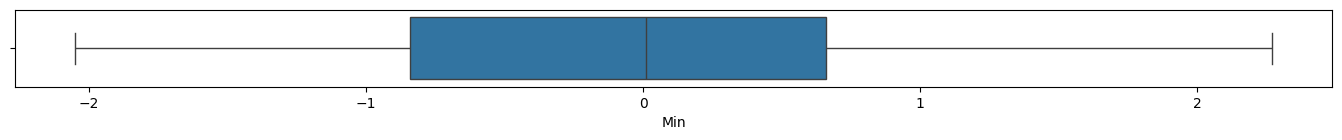

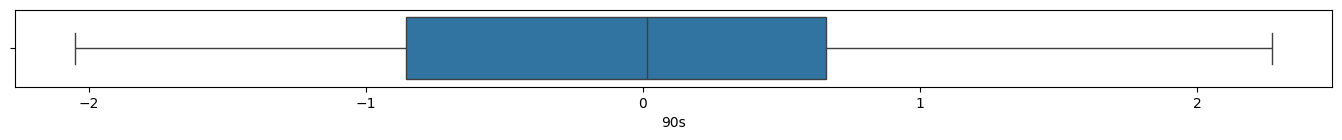

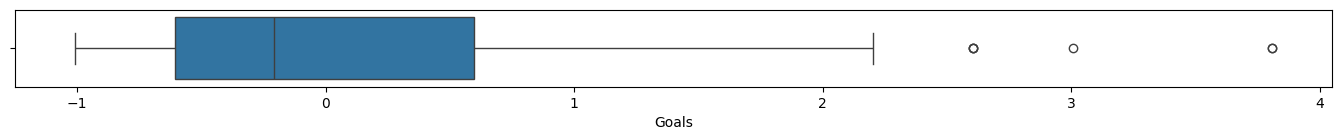

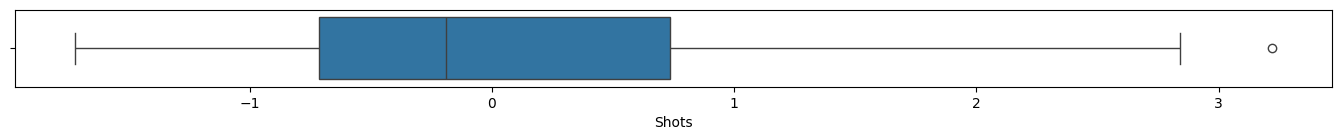

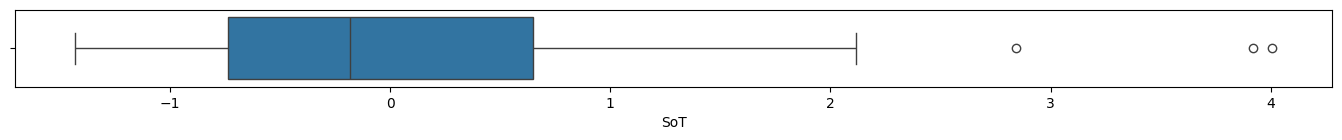

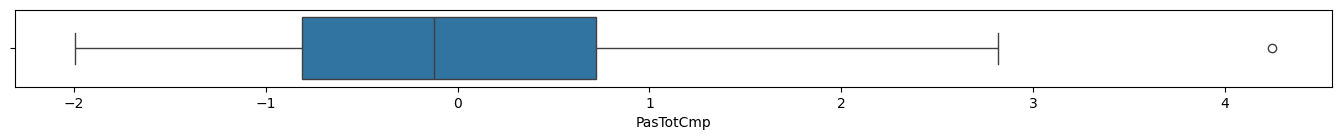

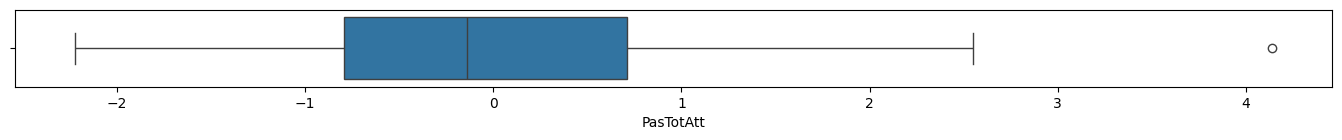

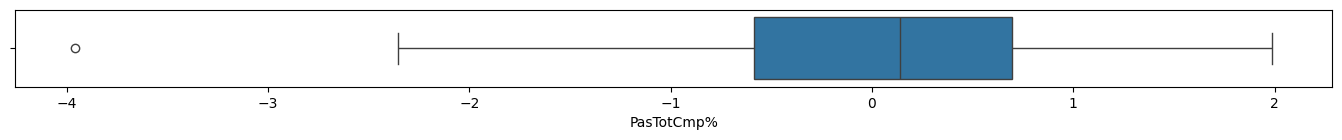

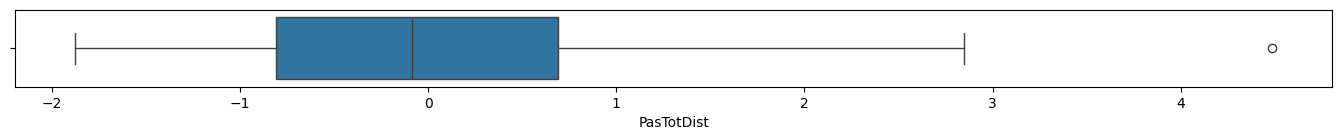

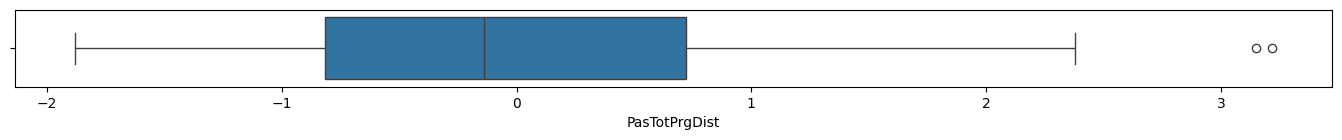

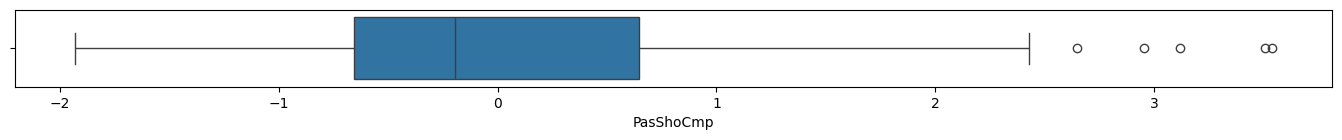

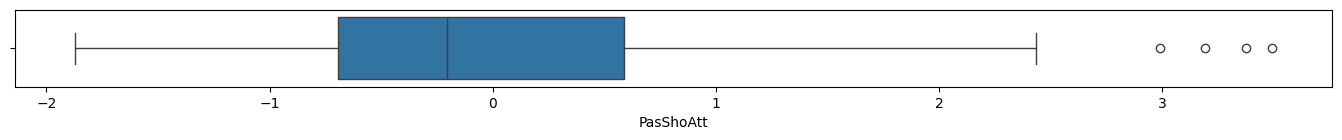

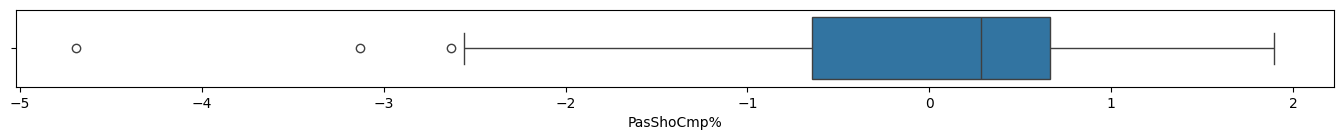

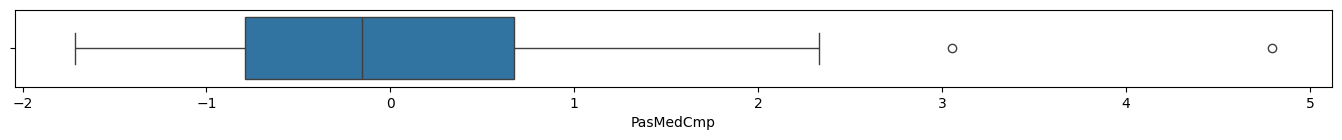

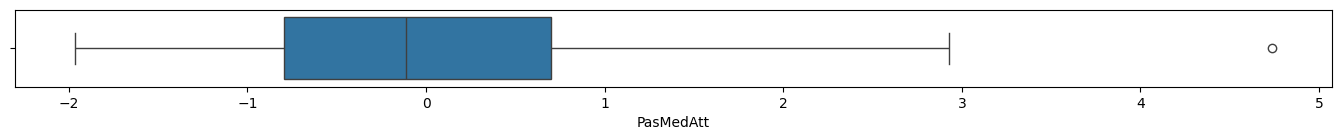

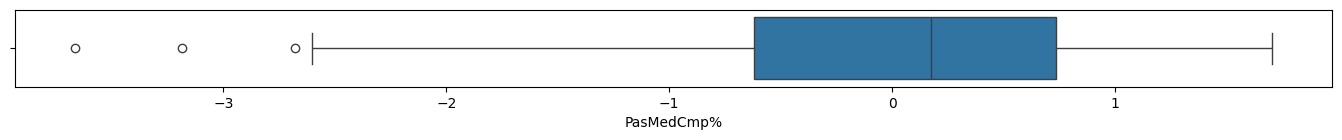

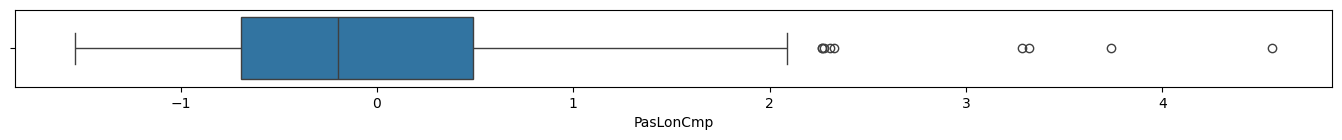

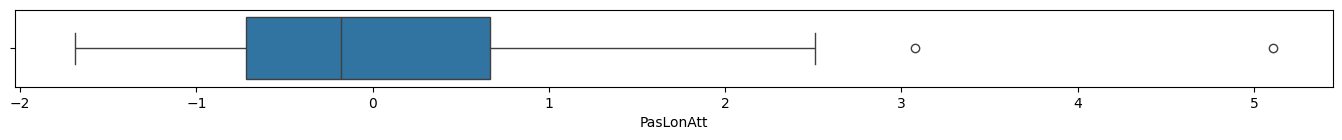

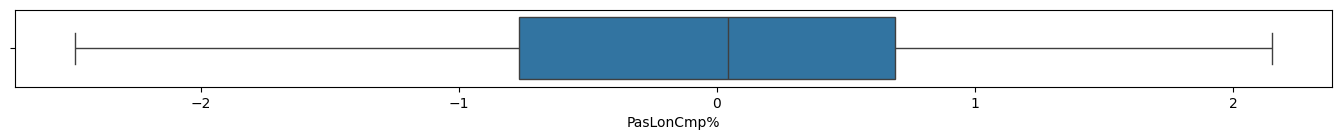

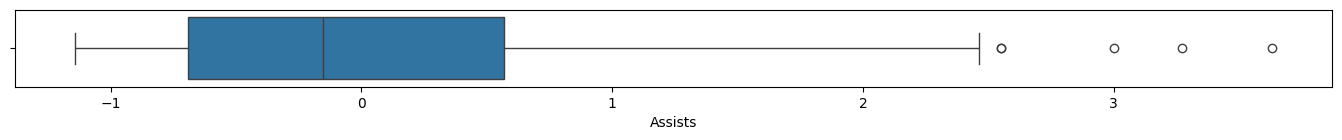

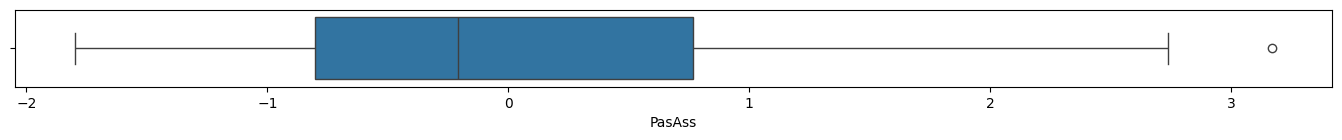

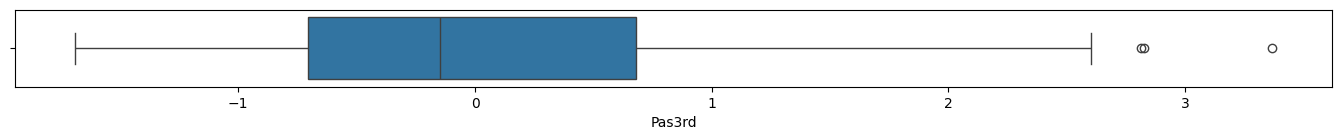

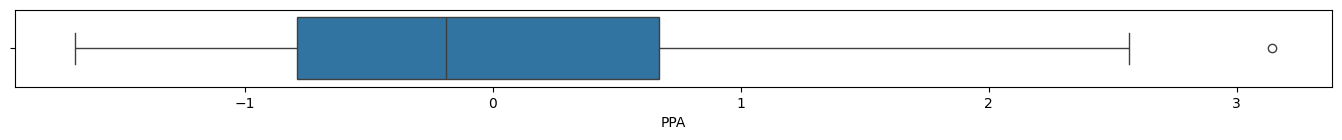

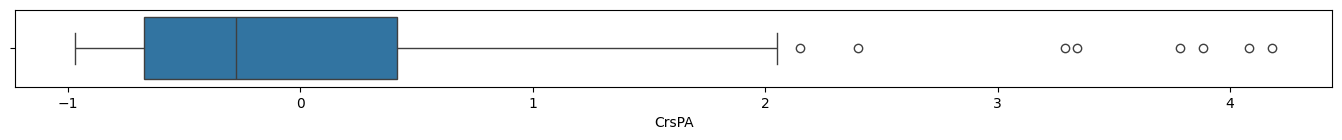

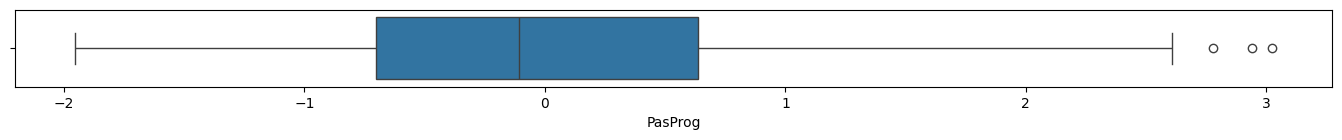

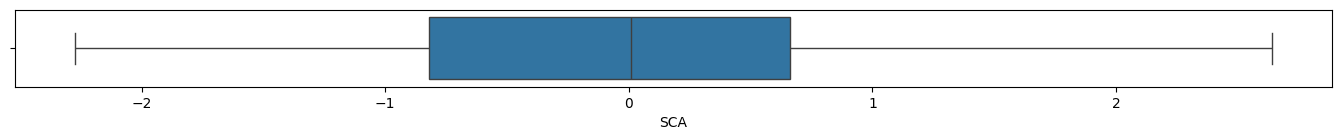

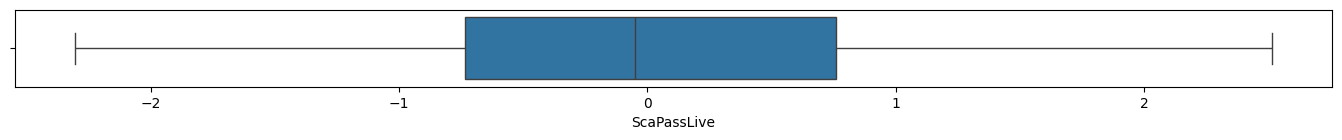

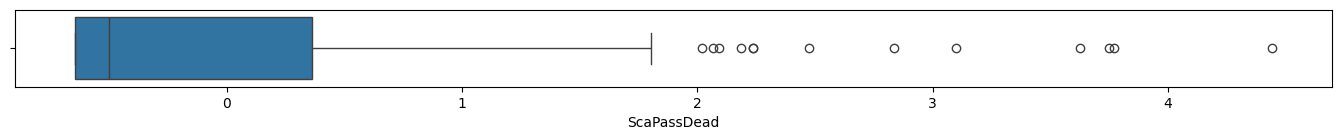

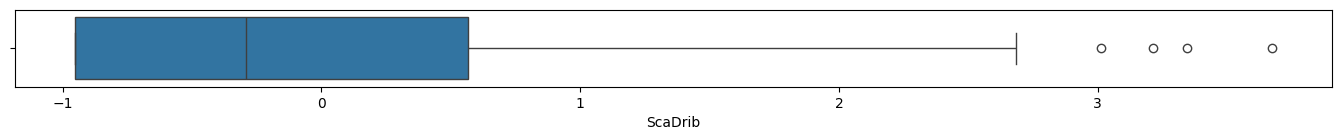

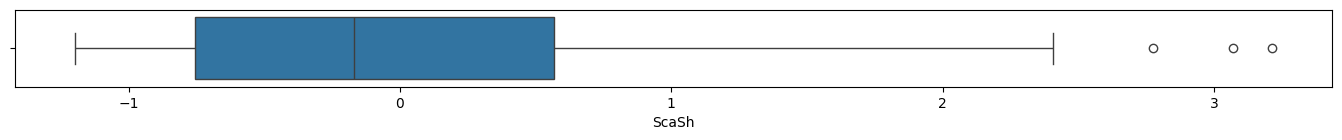

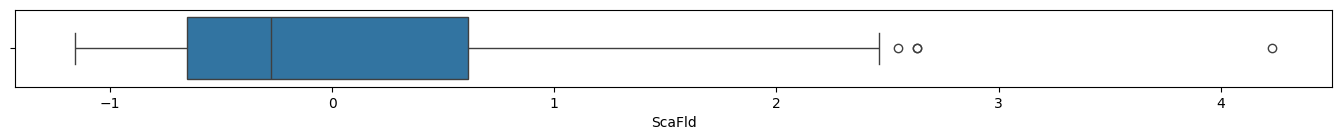

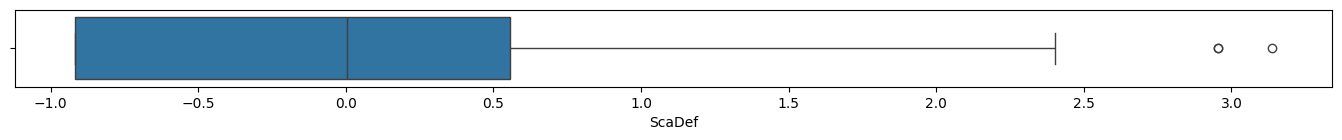

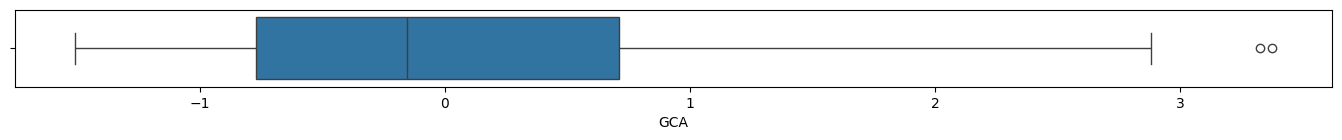

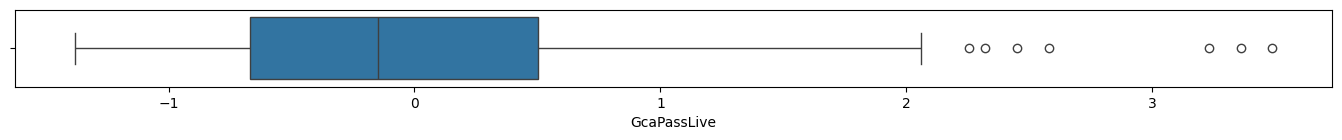

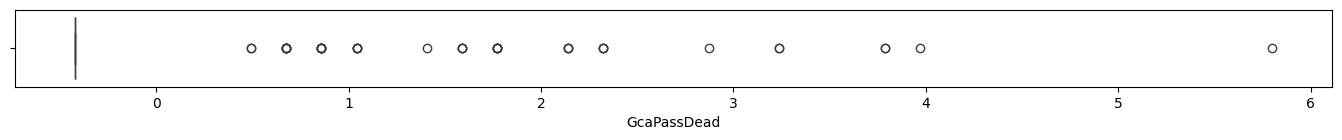

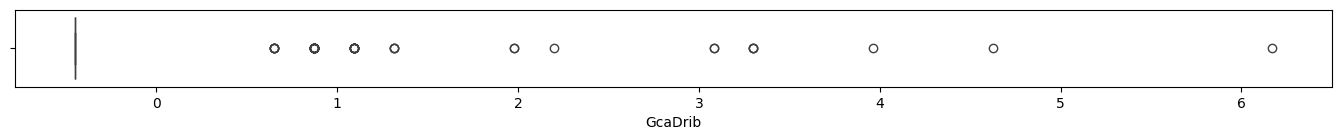

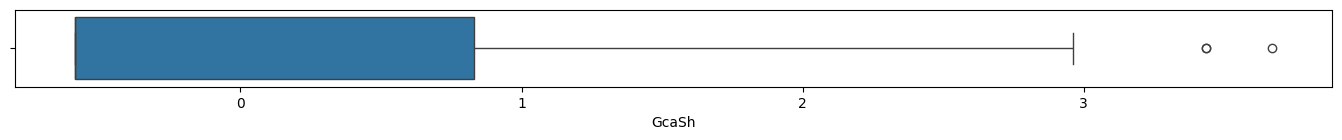

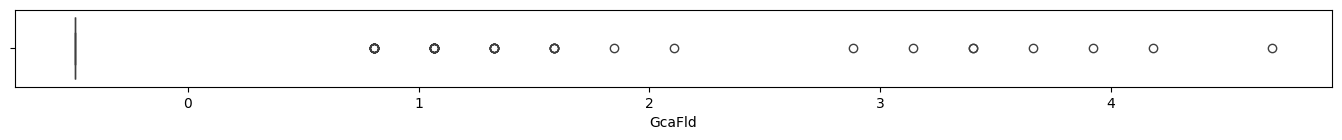

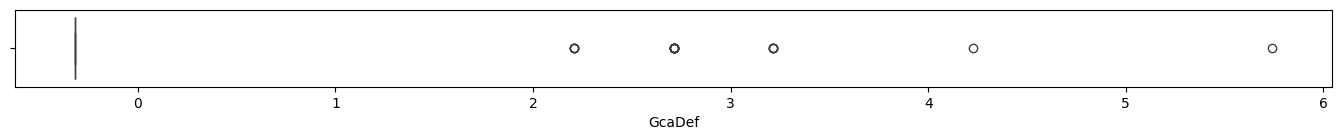

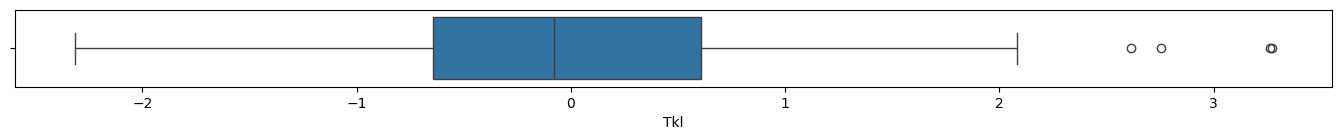

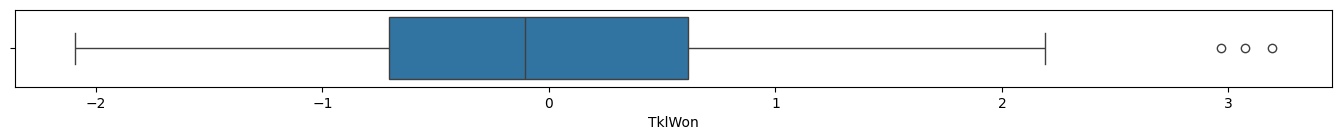

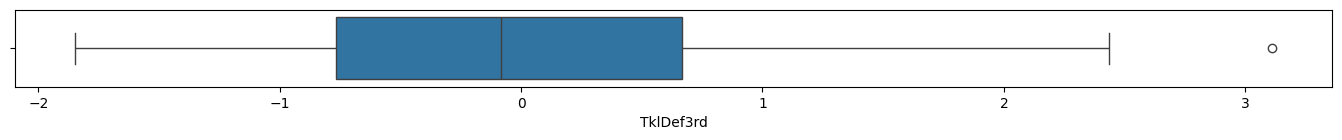

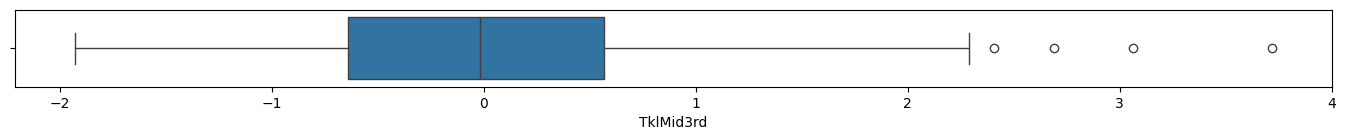

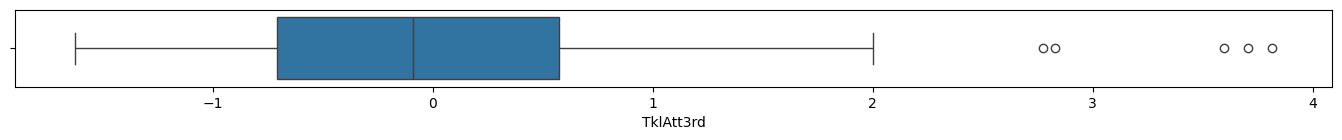

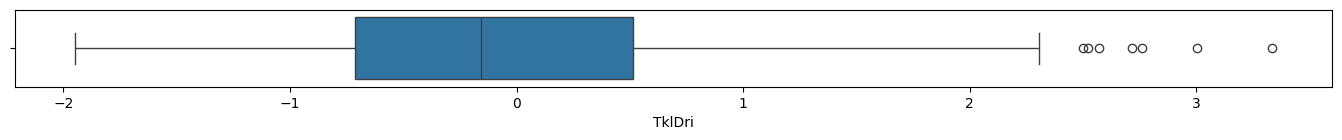

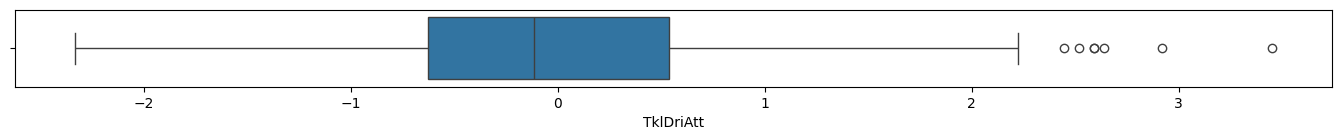

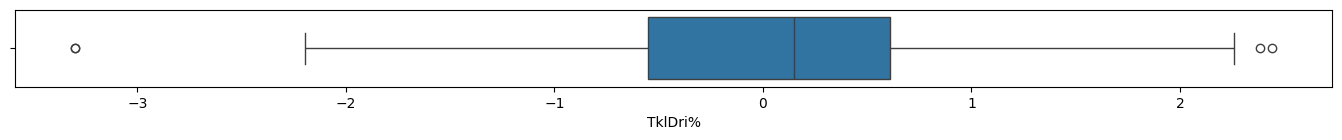

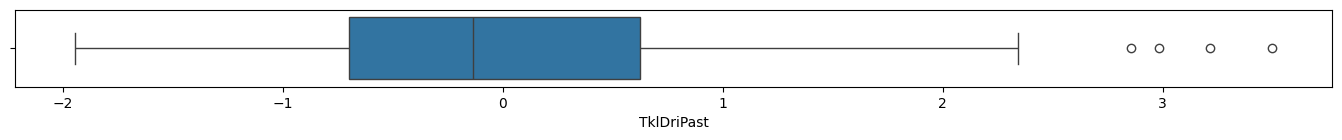

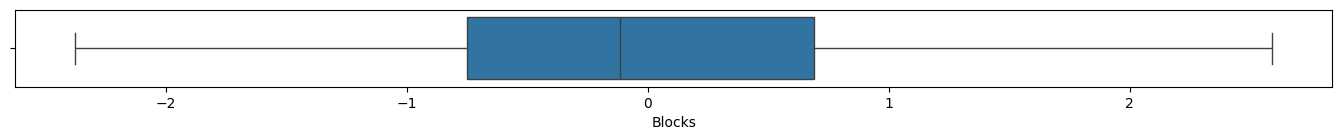

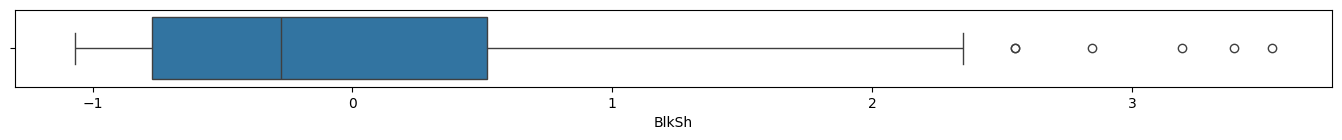

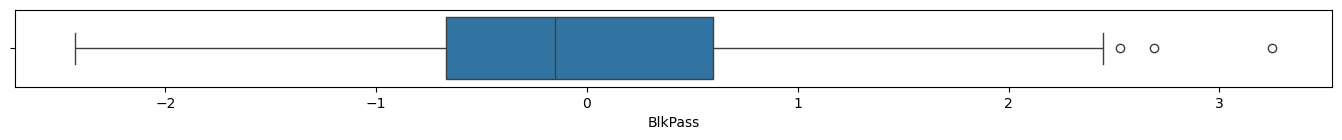

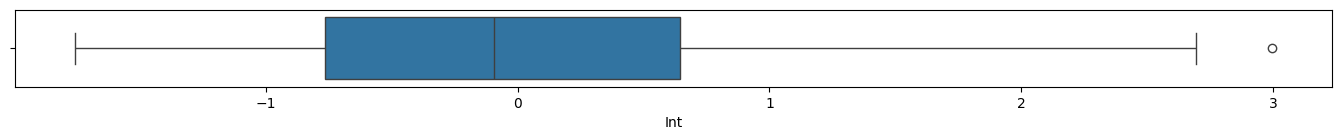

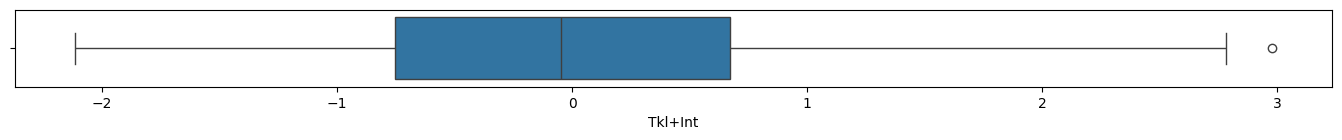

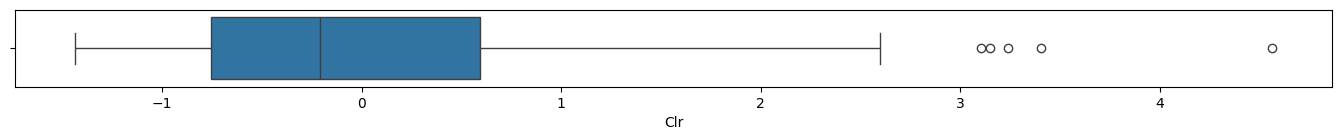

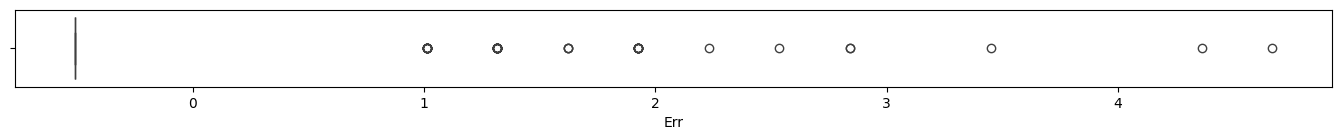

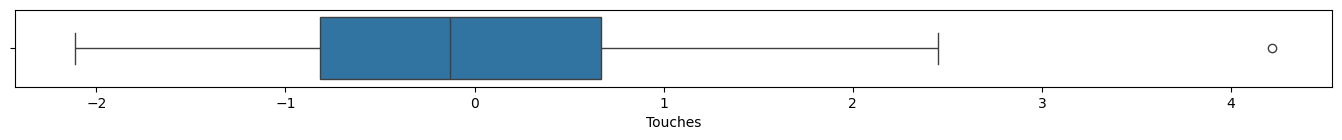

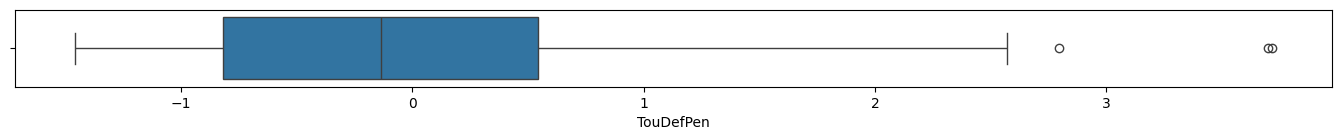

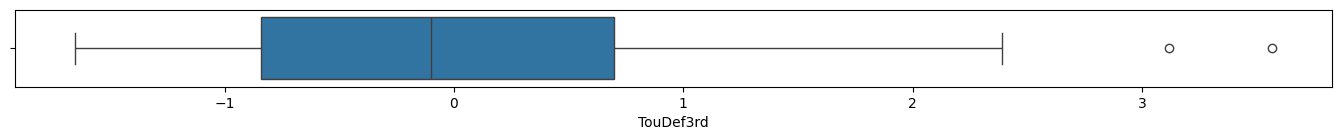

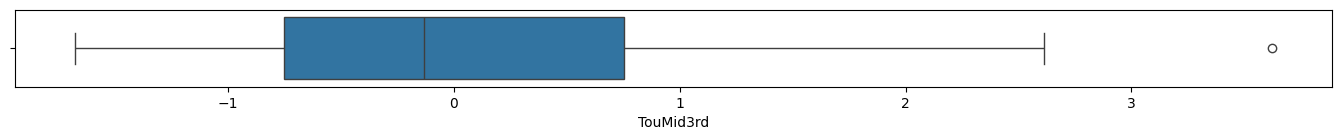

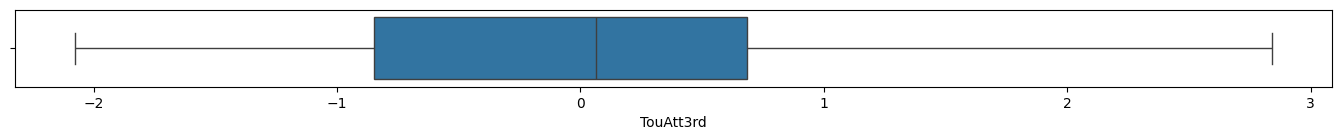

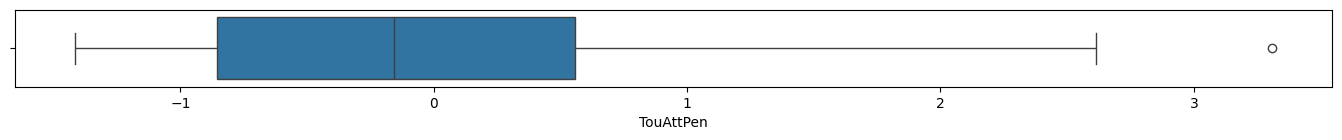

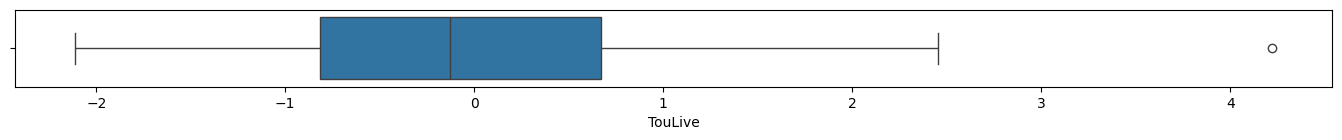

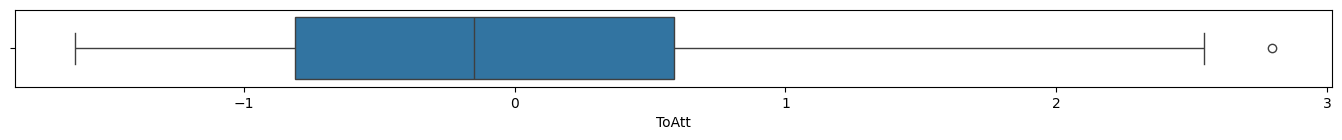

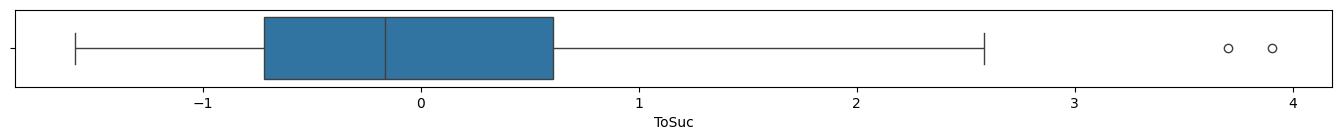

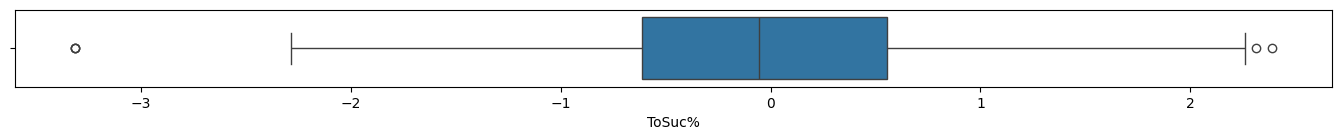

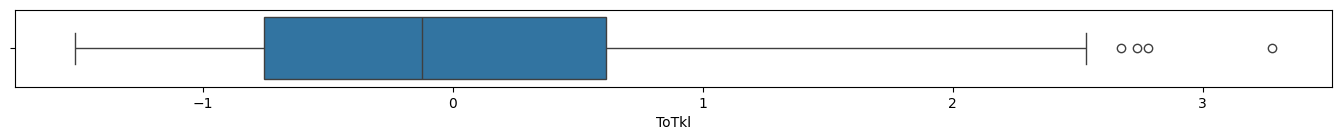

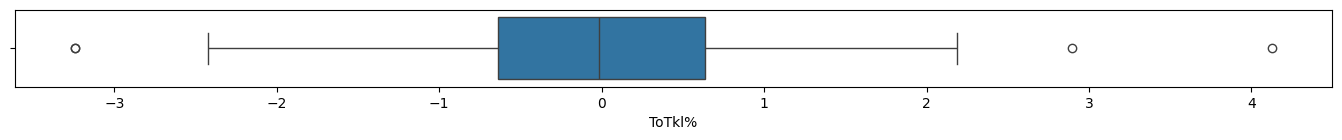

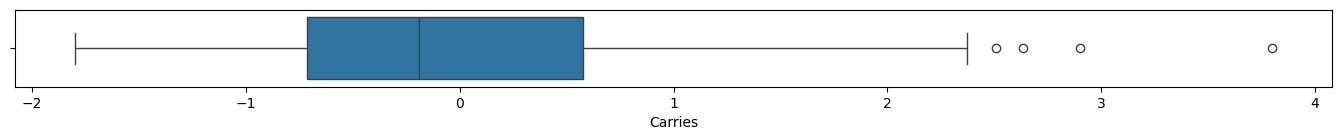

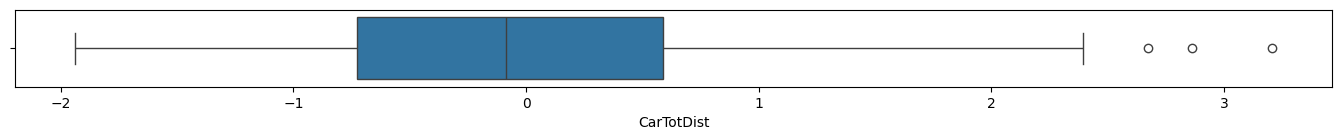

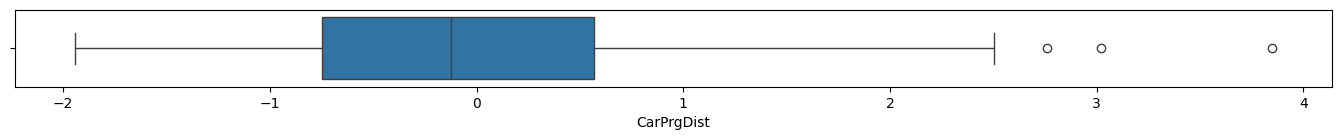

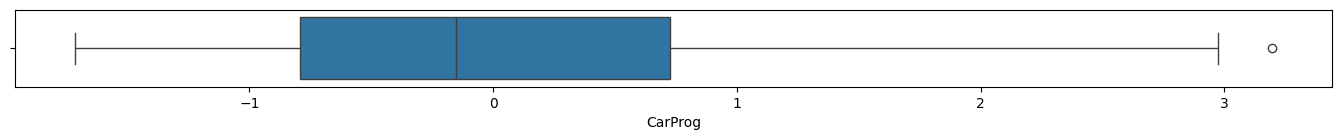

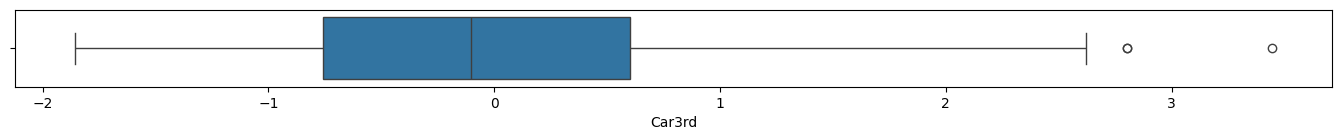

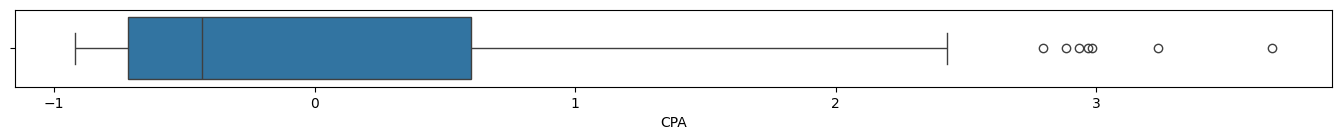

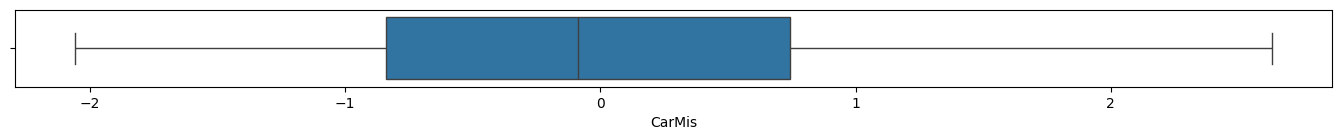

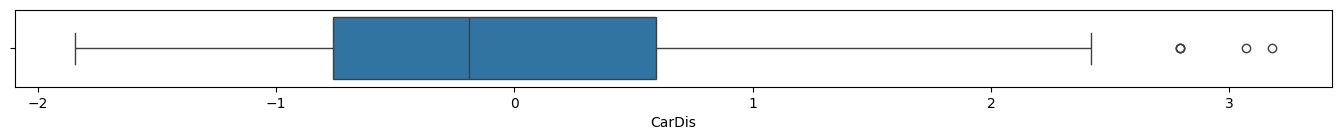

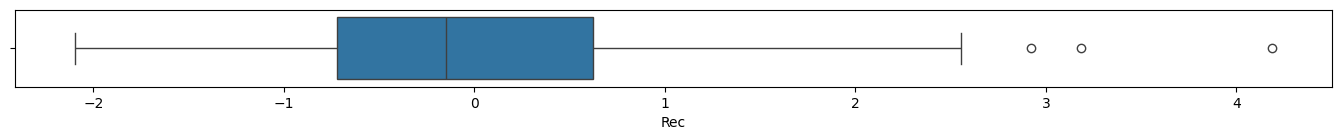

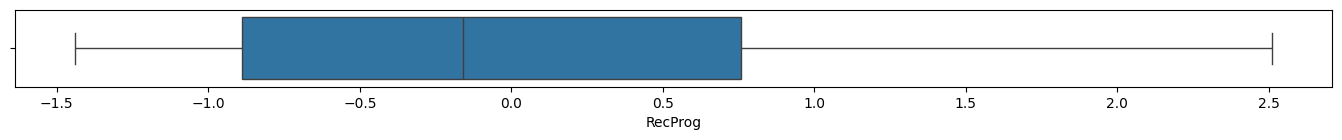

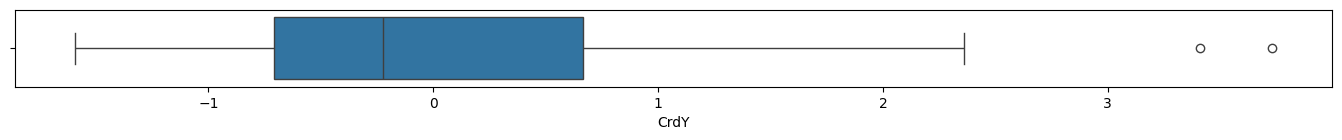

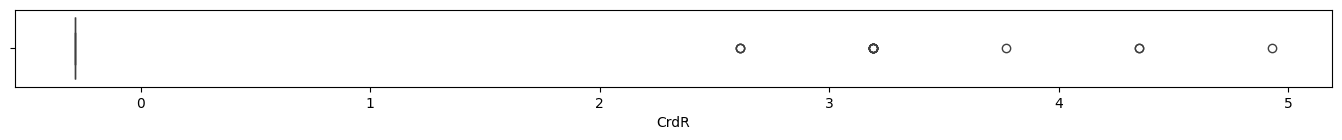

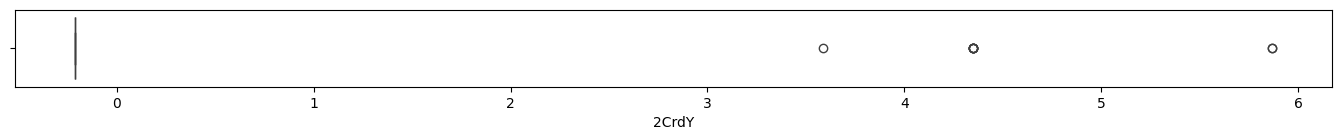

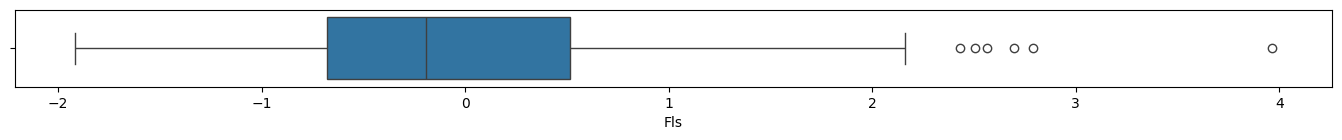

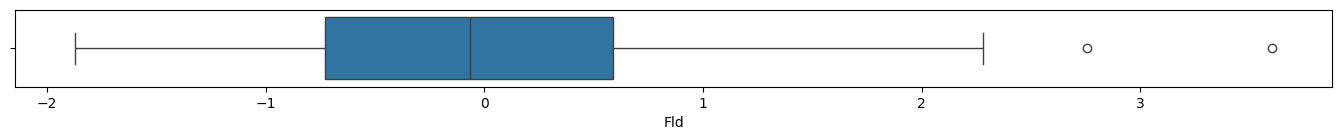

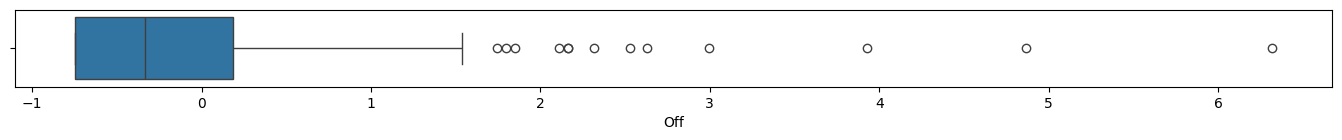

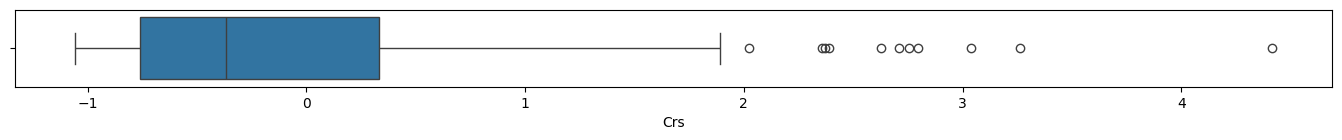

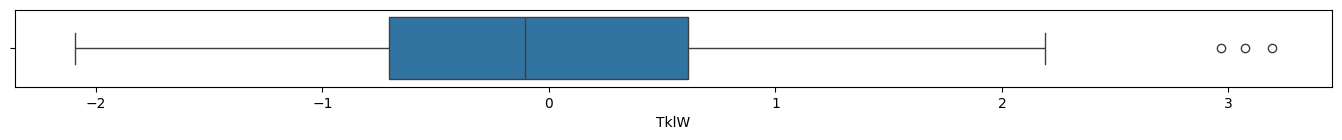

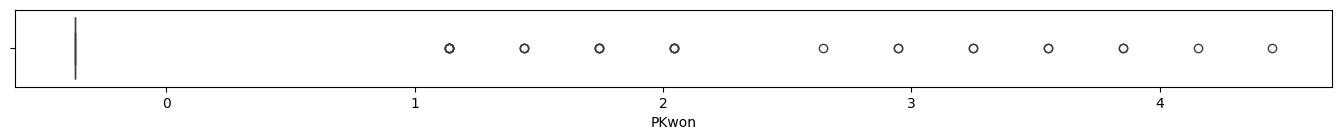

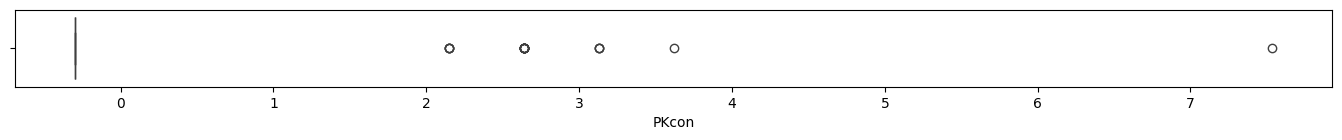

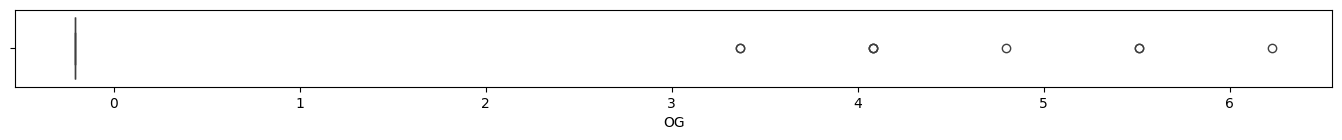

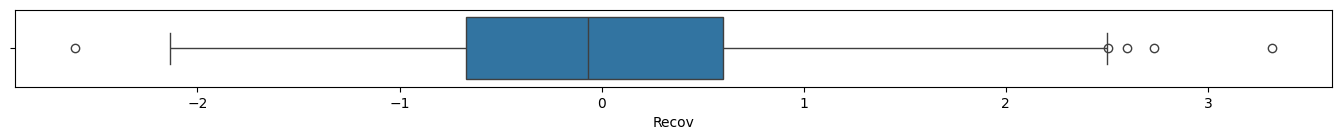

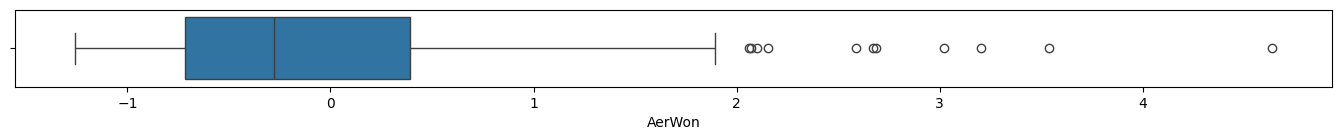

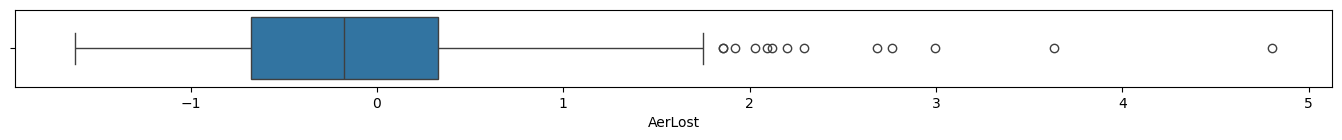

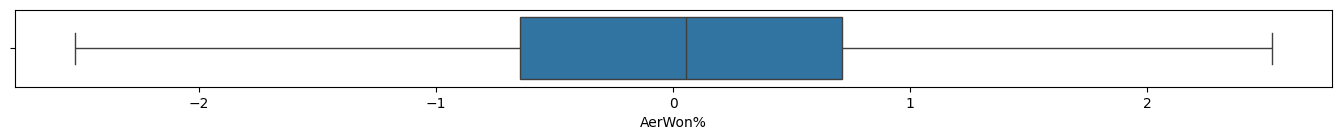

In [188]:
for column in midfielders:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=midfielders, x=column)

# 3. Explatory Data Analysis <a class="anchor" id="DATA"></a>

In [189]:
midfielders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 92 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Min            204 non-null    float64
 1   90s            204 non-null    float64
 2   Goals          204 non-null    float64
 3   Shots          204 non-null    float64
 4   SoT            204 non-null    float64
 5   PasTotCmp      204 non-null    float64
 6   PasTotAtt      204 non-null    float64
 7   PasTotCmp%     204 non-null    float64
 8   PasTotDist     204 non-null    float64
 9   PasTotPrgDist  204 non-null    float64
 10  PasShoCmp      204 non-null    float64
 11  PasShoAtt      204 non-null    float64
 12  PasShoCmp%     204 non-null    float64
 13  PasMedCmp      204 non-null    float64
 14  PasMedAtt      204 non-null    float64
 15  PasMedCmp%     204 non-null    float64
 16  PasLonCmp      204 non-null    float64
 17  PasLonAtt      204 non-null    float64
 18  PasLonCmp%

**I plot the distribution of the intresting features in this case**


**For Jorginho (Regista)**:

* **PasTotCmp, PasTotAtt, PasTotCmp**: These features highlight Jorginho's exceptional passing ability and ball circulation skills. Look for replacements who can maintain a high passing completion rate and distribute the ball effectively.
* **PasShortCmp, PasMedCmp, PasLonCmp**: Analyze Jorginho's short, medium, and long-range passing effectiveness. A replacement might not replicate his all-around ability, but aim for someone strong in at least one area (e.g., short passing for possession or long diagonals to switch play).
* **Tkl, Int**: While not Jorginho's strongest suit, these features provide a basic defensive presence. A replacement might need to offer slightly more defensive contribution.
* **Min, Touches**: These can indicate the avaibality of the player, stamina and playing style which is also important.
  
**For Thomas Partey (Box-to-Box Midfielder):**

* **Tkl, TklWon, TklInt (Tkl+Int)**: These showcase Partey's defensive solidity and ability to win the ball back. The replacement should offer similar tackling and ball-winning capabilities.
* **TklDef3rd, TklMid3rd, TklAtt3rd**: Analyze Partey's defensive distribution across the field. Look for someone who can effectively tackle in different areas of the pitch.
* **PasTotCmp, PasTotAtt, PasTotCmp:** While not Partey's main focus, a good box-to-box midfielder should be a decent passer. The replacement should be able to contribute to build-up play and transition smoothly from defense to attack.
* **Carries, CarTotDist:** These features highlight Partey's ability to carry the ball forward and progress play. The replacement should be comfortable progressing with the ball at their feet.

**Additional Features to Consider:**

* **SCA, GCA:** These advanced metrics indicate a player's contribution to creating goalscoring opportunities. Look for replacements who can contribute offensively, especially if Jorginho is being replaced.
* **AerWon, AerLost, AerWon:** These features are important if your team prioritizes aerial battles in midfield. Consider them if Partey is a key player in winning aerial duels.


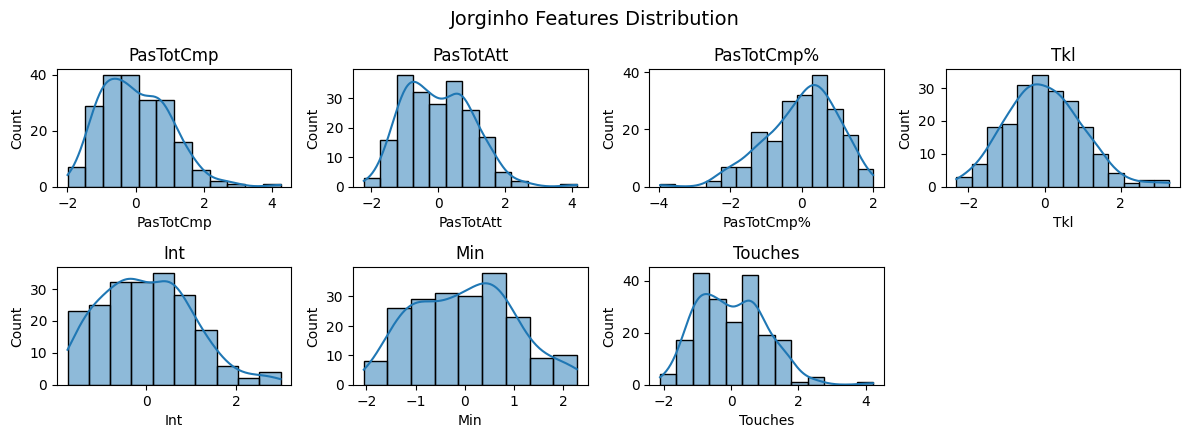

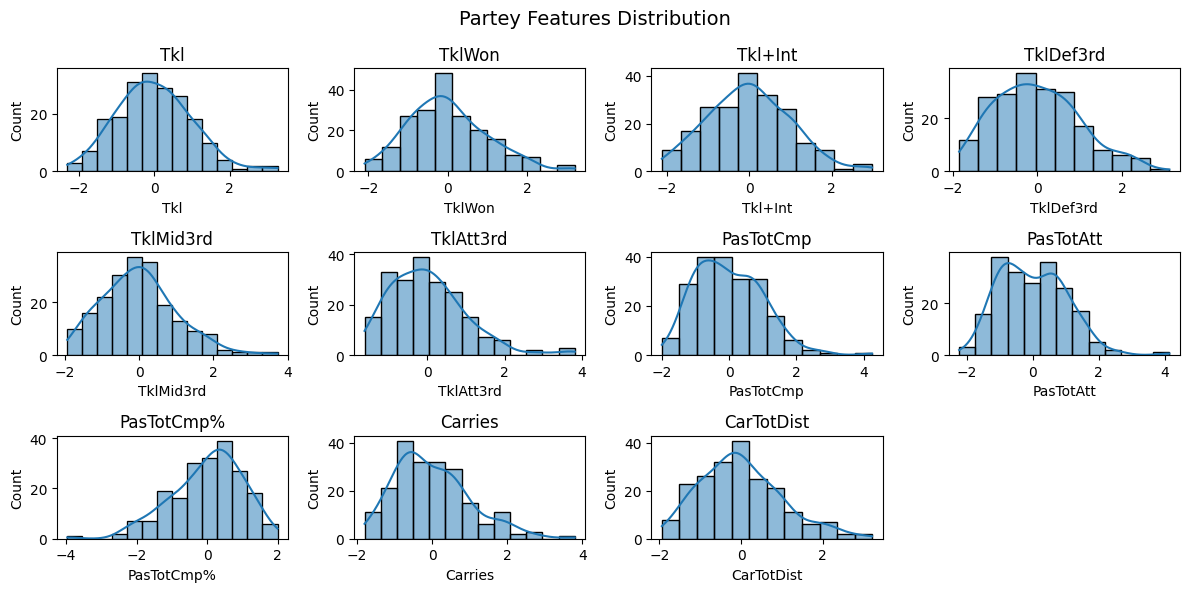

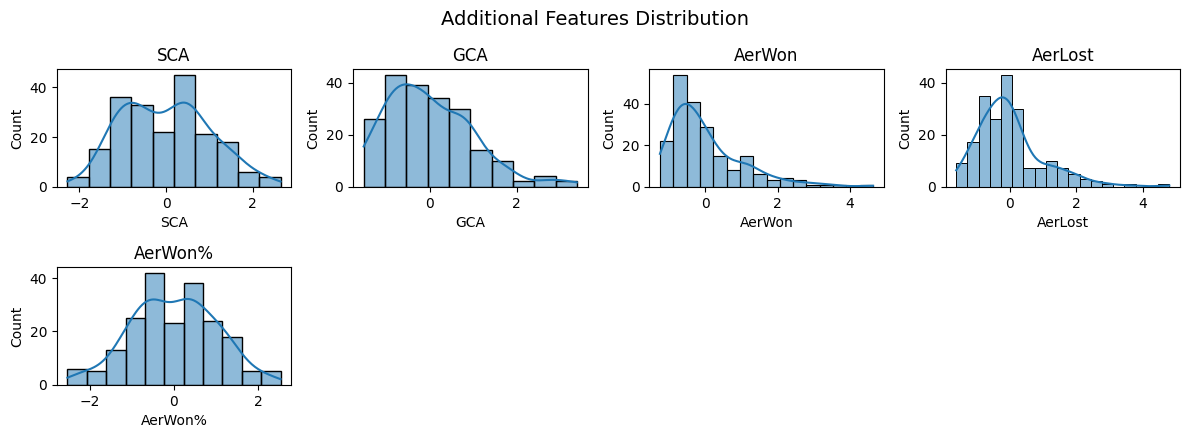

In [190]:
# Features for Jorginho (Regista)
jorginho_features = [
    "PasTotCmp",
    "PasTotAtt",
    "PasTotCmp%",
    "Tkl",
    "Int",
    "Min",
    "Touches",
]

# Features for Thomas Partey (Box-to-Box Midfielder)
partey_features = [
    "Tkl",
    "TklWon",
    "Tkl+Int",  
    "TklDef3rd",
    "TklMid3rd",
    "TklAtt3rd",
    "PasTotCmp",
    "PasTotAtt",
    "PasTotCmp%",
    "Carries",
    "CarTotDist",
]

additional_features = ["SCA", "GCA", "AerWon", "AerLost", "AerWon%"]
features_desired =list(set(jorginho_features + partey_features + additional_features))



# Plot Jorginho features
plt.figure(figsize=(12, 6))  
plt.suptitle('Jorginho Features Distribution', fontsize=14)
for i, feature in enumerate(jorginho_features):
    plt.subplot(3, 4, i+1)
    sns.histplot(midfielders[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

# Plot Partey features
plt.figure(figsize=(12, 6))  
plt.suptitle('Partey Features Distribution', fontsize=14)
for i, feature in enumerate(partey_features):
    plt.subplot(3, 4, i+1)
    sns.histplot(midfielders[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

# Plot additional features (optional)
if len(additional_features) > 0:
    plt.figure(figsize=(12, 6))  
    plt.suptitle('Additional Features Distribution', fontsize=14)
    for i, feature in enumerate(additional_features):
        plt.subplot(3, 4, i+1)
        sns.histplot(midfielders[feature], kde=True)
        plt.title(feature)
    plt.tight_layout()
    plt.show()

**Remark**: In general, we can see that there are quite many features that have a right-skewed distribution, which suggest that there are few players that excel in those features, these are the players that could be valuable to be added in the squad.

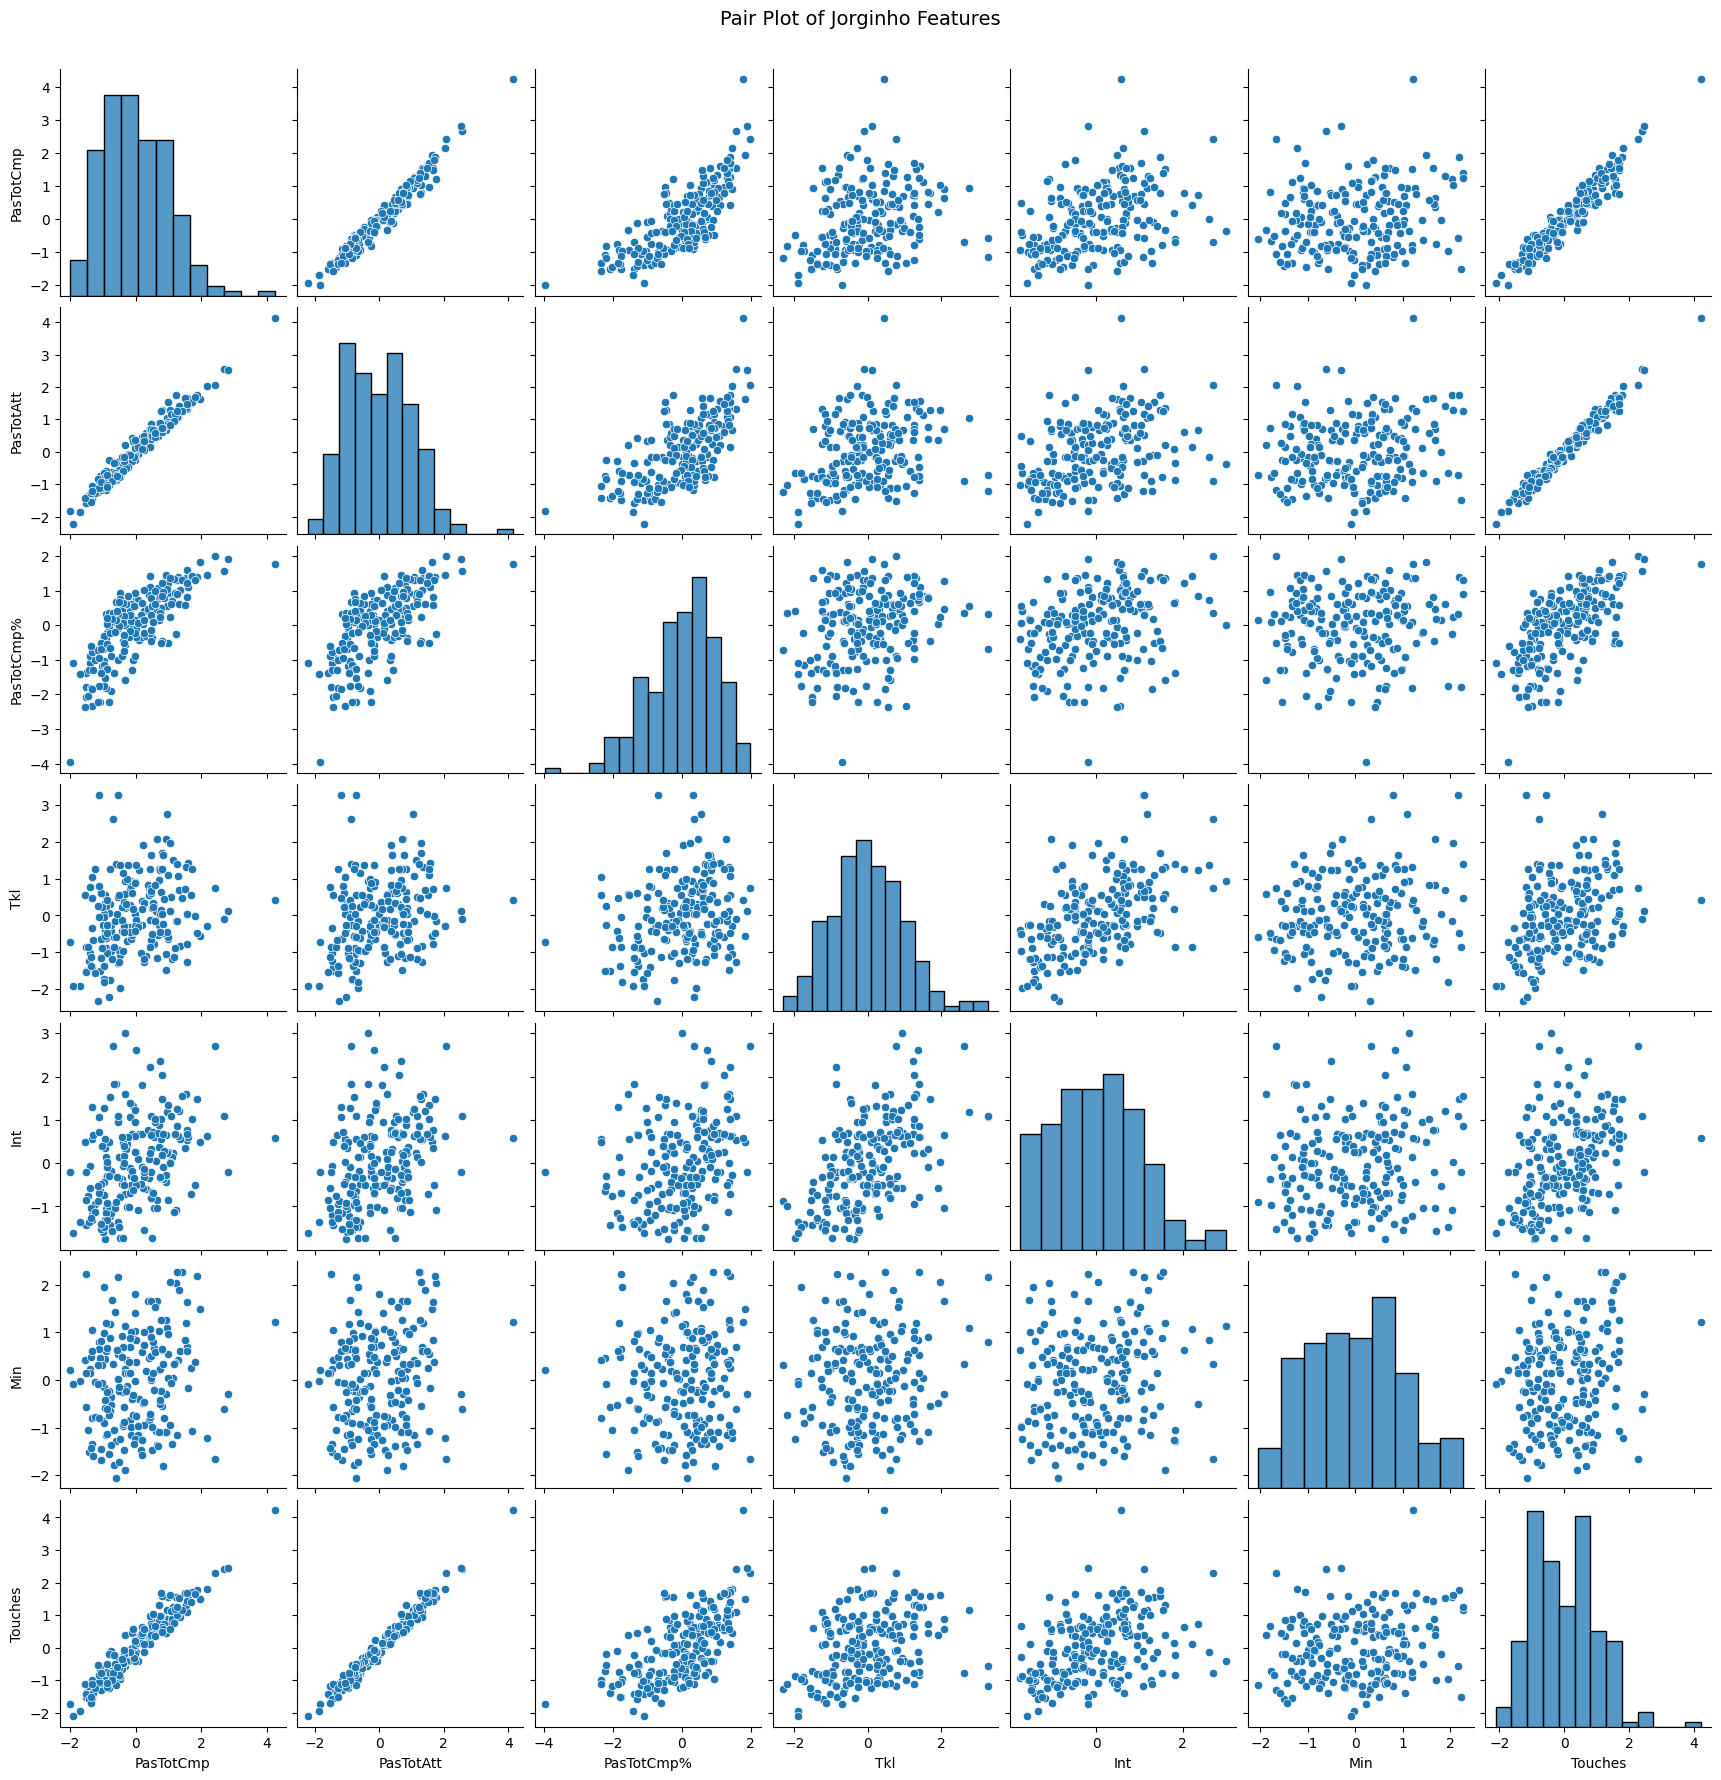

In [191]:
# Lets see the relationships between the features

# Create pairplot
sns.pairplot(midfielders[jorginho_features])
plt.suptitle('Pair Plot of Jorginho Features', fontsize=14, y=1.02)
plt.show()


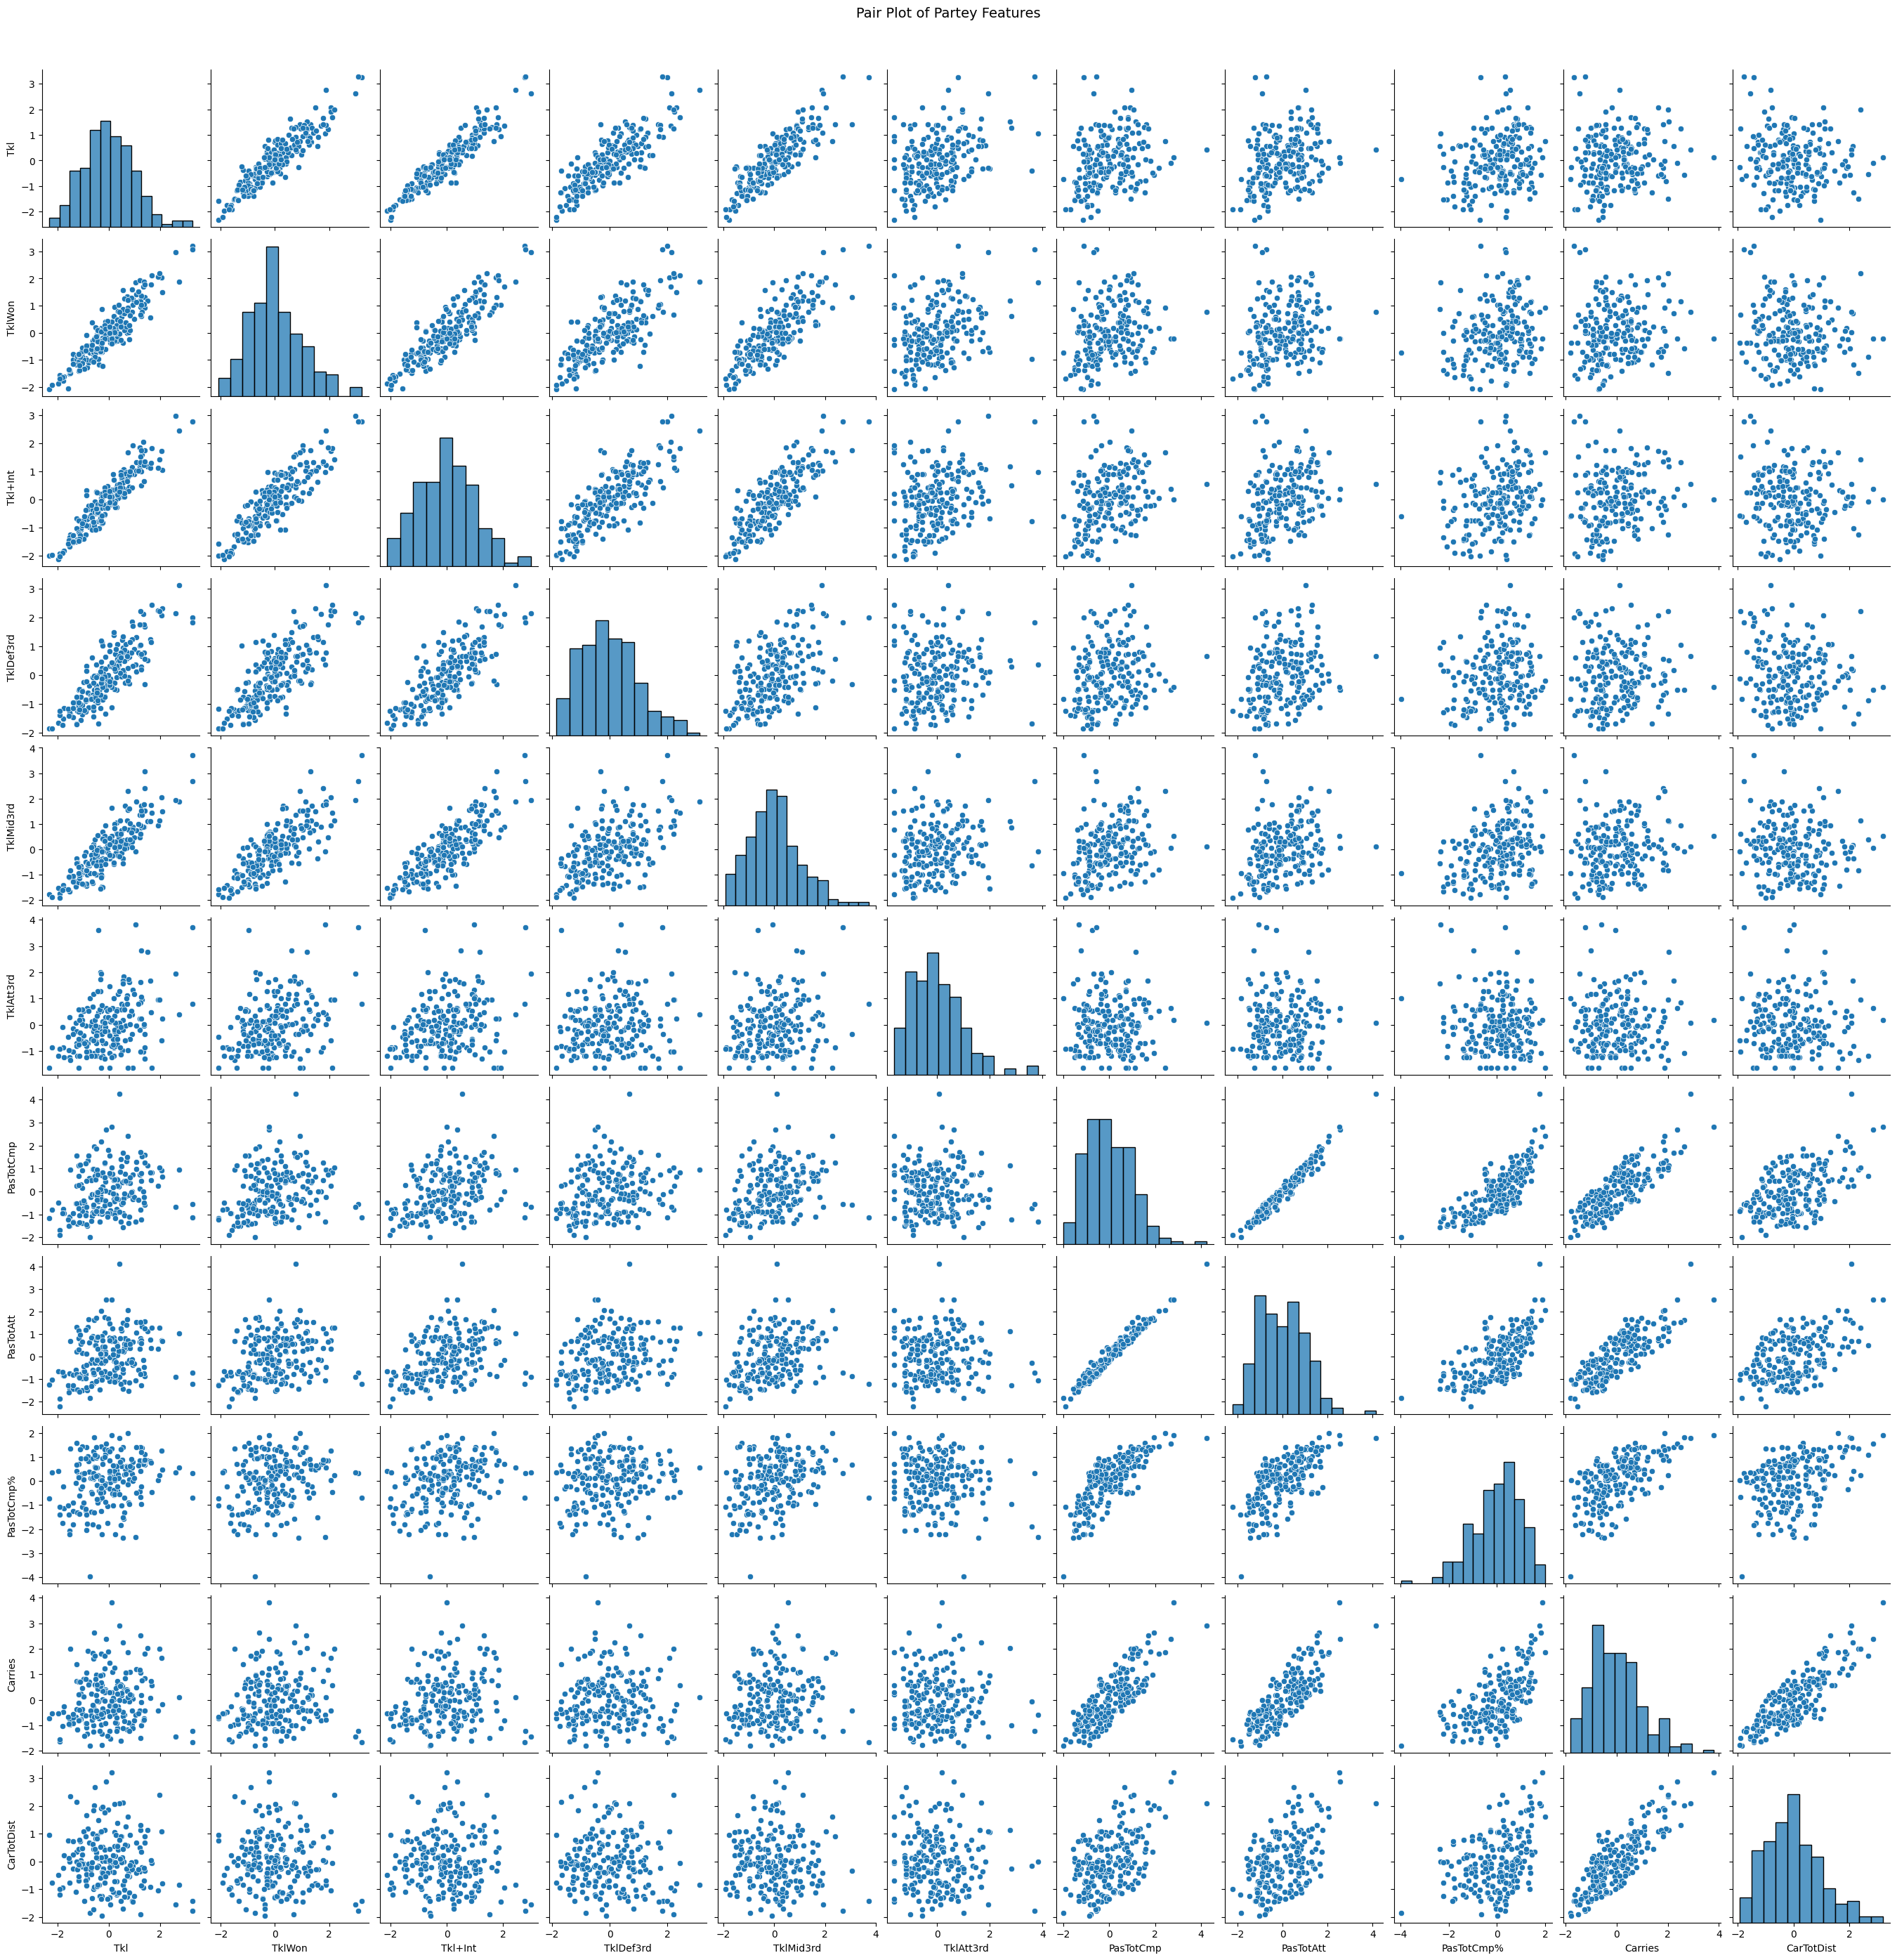

In [192]:
sns.pairplot(midfielders[partey_features])
plt.suptitle('Pair Plot of Partey Features', fontsize=14, y=1.02)
plt.show()

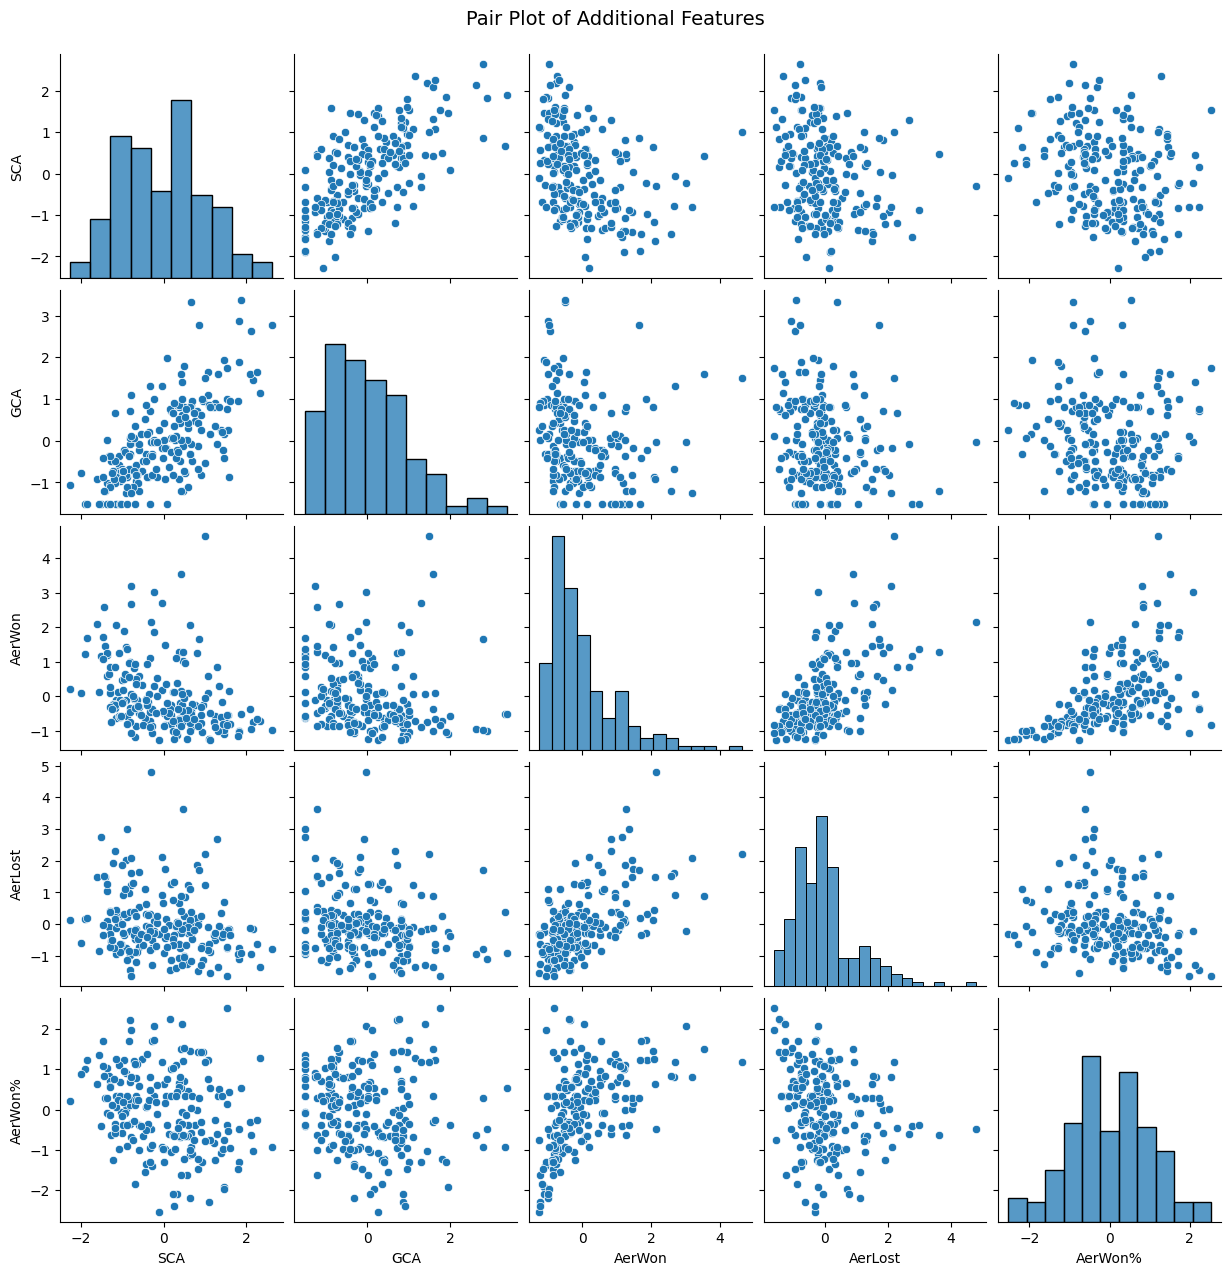

In [193]:
sns.pairplot(midfielders[additional_features])
plt.suptitle('Pair Plot of Additional Features', fontsize=14, y=1.02)
plt.show()

**remark**: I noticed that all the data has no apparent structure like spirals or concentric circles and seems linear separability so PCA might be best in this case.

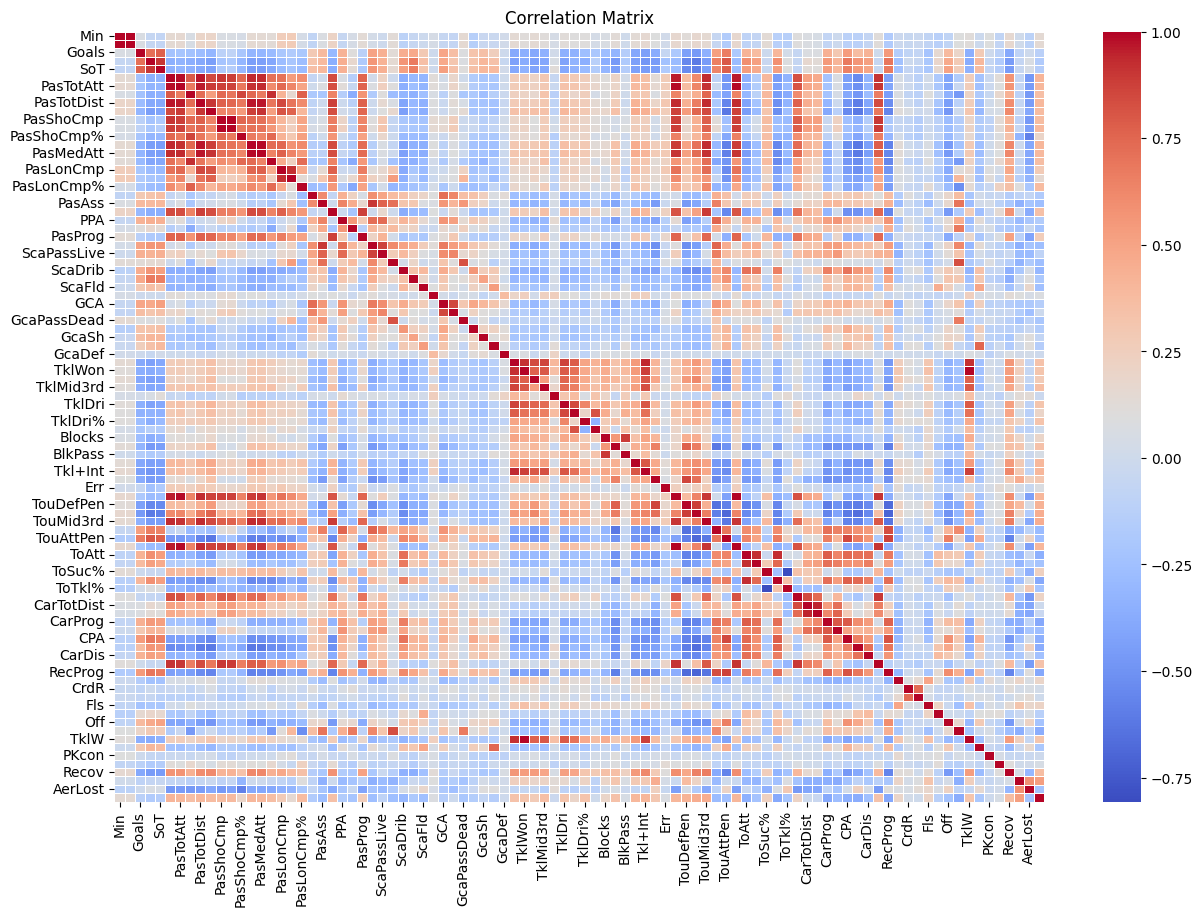

In [194]:
corr_matrix = midfielders.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Remark** : There are not much to note here as for example, PasTotCmp and PasTotAtt have strong correlations as the player who attempt more passes will also complete more passes. 

# 4. Principal Component Analysis PCA <a class="anchor" id="PCA"></a>
As we have a large amounts of feature, it's the best to perform dimension reduction technique. 

In [195]:
pca = PCA()
mid_all = pca.fit_transform(midfielders)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()


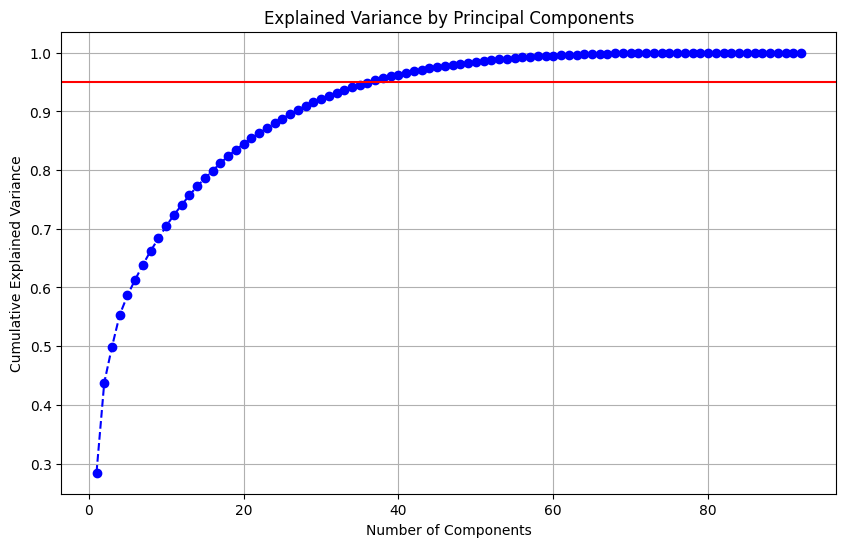

In [196]:
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [197]:
# Find the optimal number of components using the elbow method
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1  # For 95% variance explained
print(f'Optimal number of components: {optimal_components}')

Optimal number of components: 37


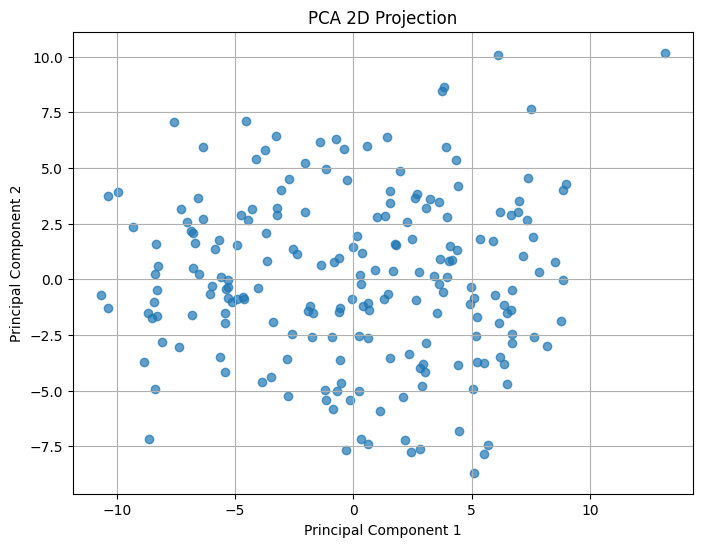

In [198]:
# Transform data using the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
mid = pca_optimal.fit_transform(midfielders)


if optimal_components >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(mid[:, 0], mid[:, 1], alpha=0.7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA 2D Projection')
    plt.grid()
    plt.show()

In [199]:
mid[:, 0].max()

13.148898645640939

**Perform PCA on midfields's feature that I selected**

In [200]:
pca_mid = PCA()
mid_reduced = pca_mid.fit_transform(midfielders[features_desired ])

explained_variance_mid = pca_mid.explained_variance_ratio_
cumulative_variance_mid = explained_variance_mid.cumsum()

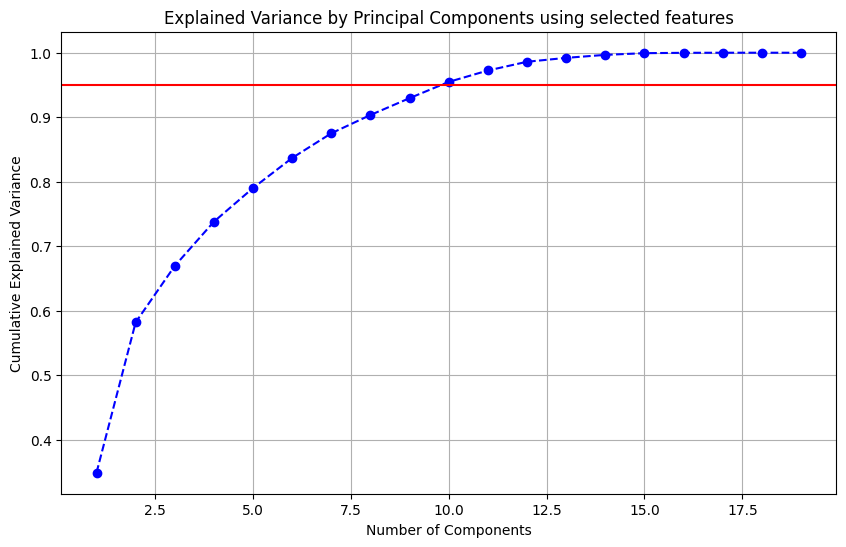

In [201]:
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_mid) + 1), cumulative_variance_mid, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components using selected features')
plt.grid(True)
plt.show()

In [202]:
# Find the optimal number of components using the elbow method
optimal_components_mid = np.argmax(cumulative_variance_mid >= 0.95) + 1  # For 95% variance explained
print(f'Optimal number of components: {optimal_components_mid}')

Optimal number of components: 10


**Remark**: By using the selected features, the number of components neede to maintain minimum 95% of cumulative variance is 10 which much more less than 37 features from before.

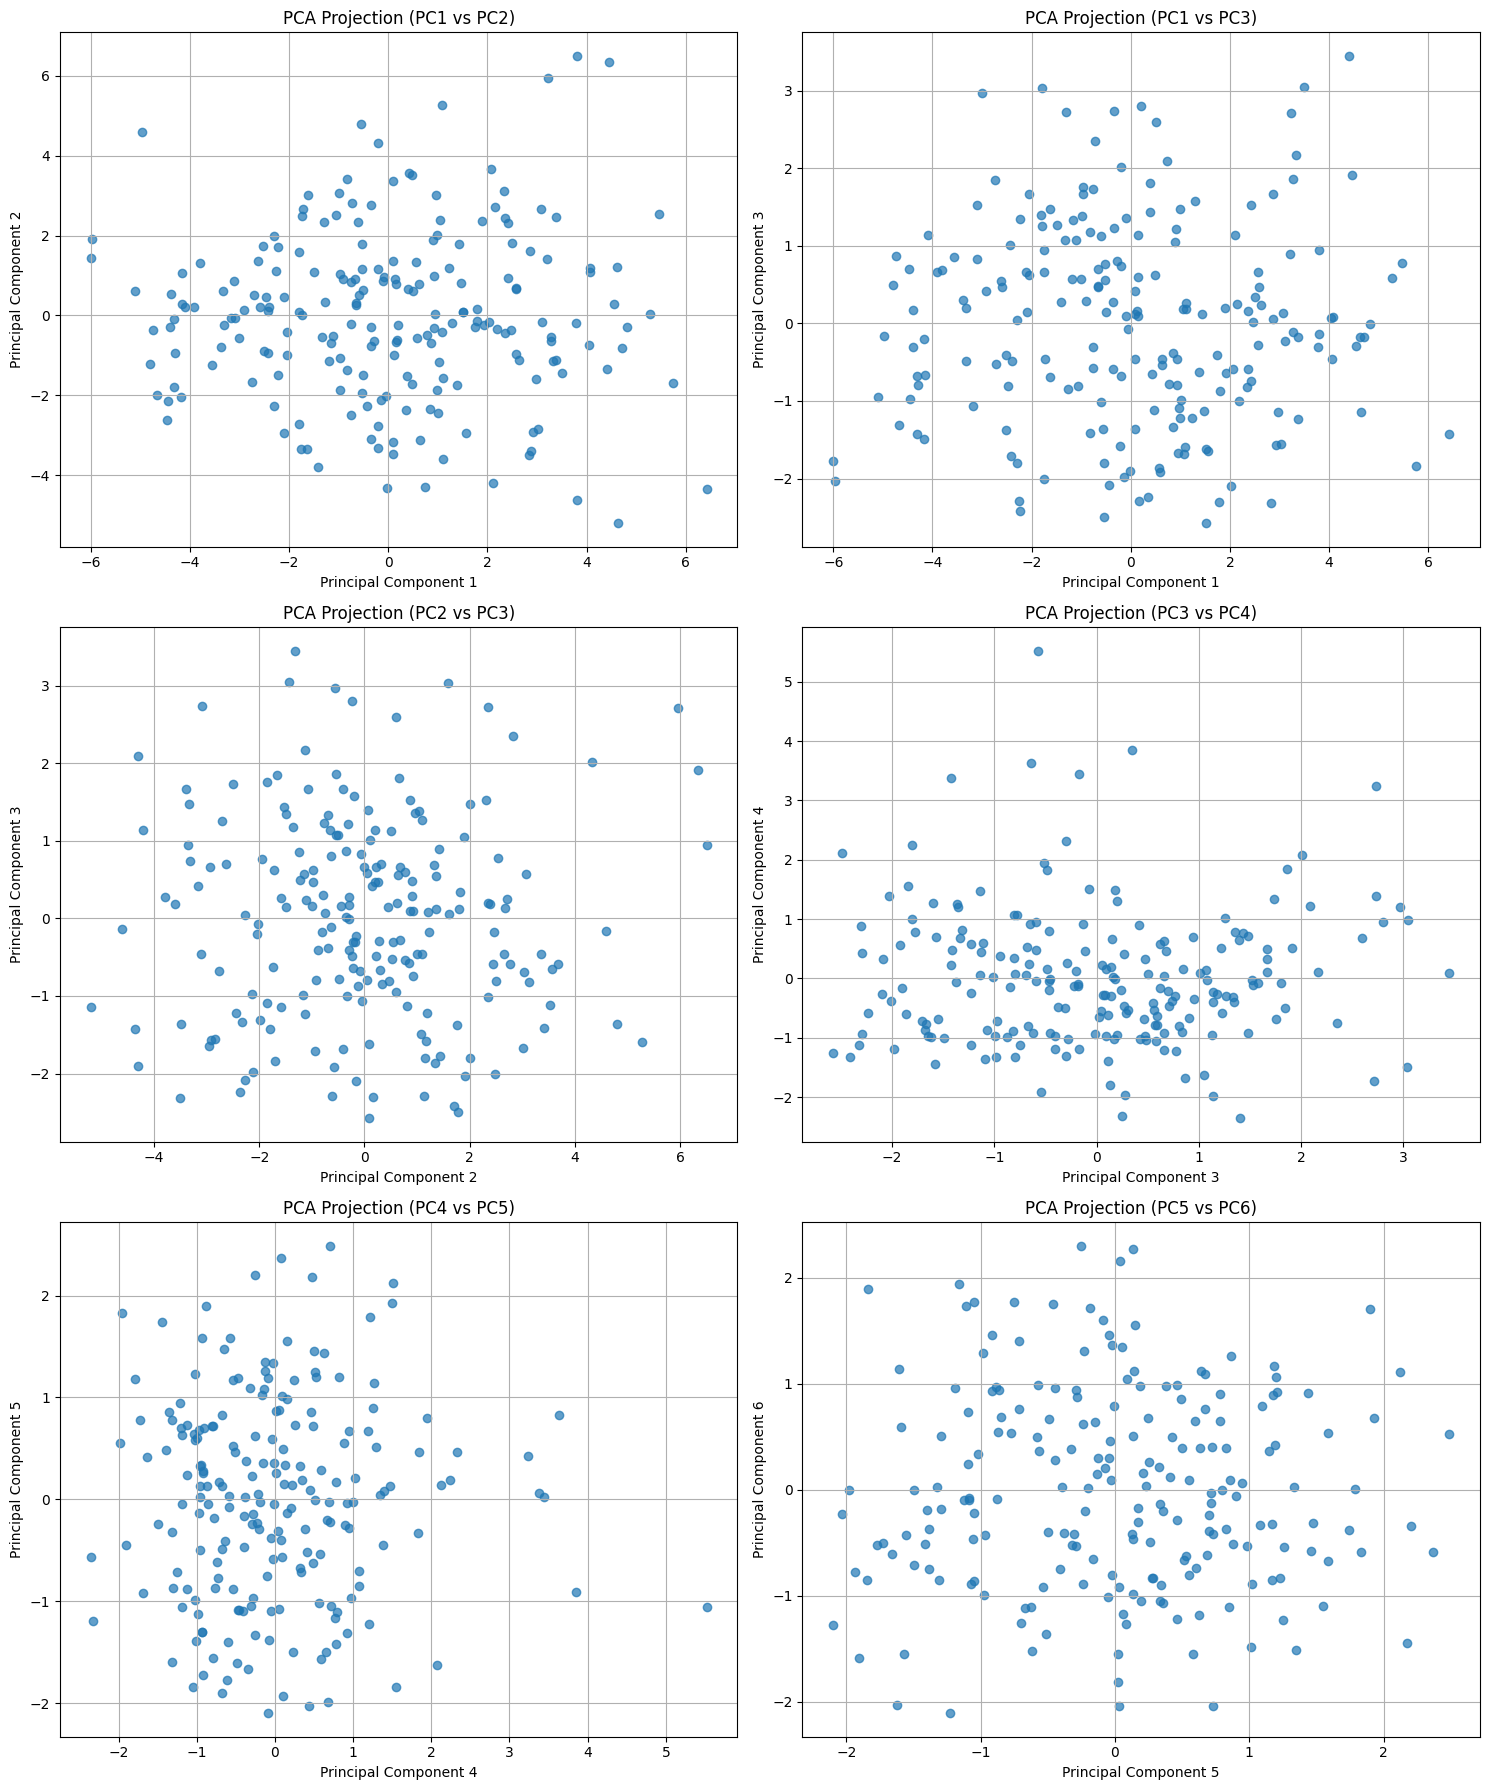

In [203]:
# Transform data using the optimal number of components
pca_optimal_mid = PCA(n_components=optimal_components_mid)
mid_reduced = pca_optimal_mid.fit_transform(midfielders[features_desired])


pairs_to_plot = [(0, 1), (0,2) ,(1, 2), (2, 3), (3, 4), (4, 5)]
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

for i, (pc1, pc2) in enumerate(pairs_to_plot):
    row, col = divmod(i, 2)
    axs[row, col].scatter(mid_reduced[:, pc1], mid_reduced[:, pc2], alpha=0.7)
    axs[row, col].set_xlabel(f'Principal Component {pc1 + 1}')
    axs[row, col].set_ylabel(f'Principal Component {pc2 + 1}')
    axs[row, col].set_title(f'PCA Projection (PC{pc1 + 1} vs PC{pc2 + 1})')
    axs[row, col].grid()

plt.tight_layout()
plt.show()

**Remark**: The first 6 principal components capture a significant portion of the variance, as indicated by the spread of the data points. This could indicate that the clustering in the next steps will  have efficient clustering.

# 5. K-Means Clustering <a class="anchor" id="KM"></a>


In [204]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
max_clusters = 40
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(mid_reduced)
    wcss.append(kmeans.inertia_)

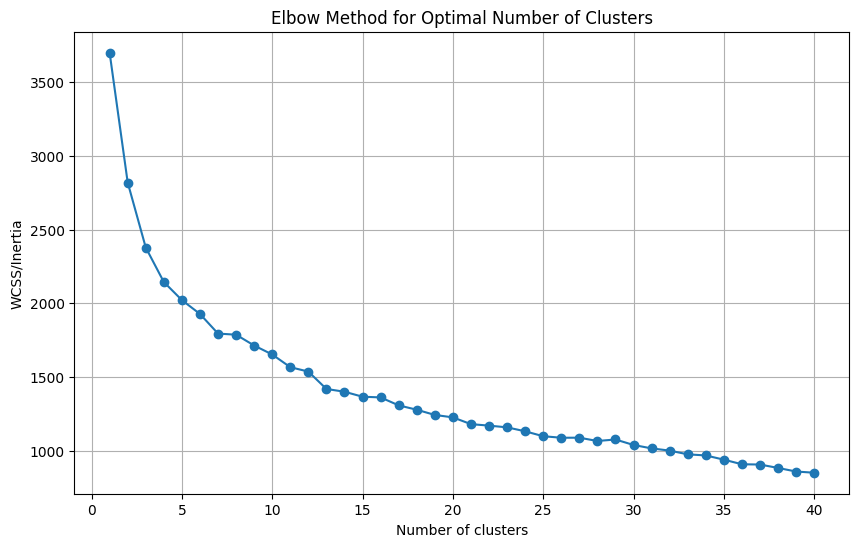

In [205]:
# Plot the Elbow method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS/Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid()
plt.show()

**Remarks**: Although it is not really clear where the 'elbow' is, I noted that the plot show a significant reduction in Inertia from 1 to 5 clusters, so I chose optimal cluster at 5.

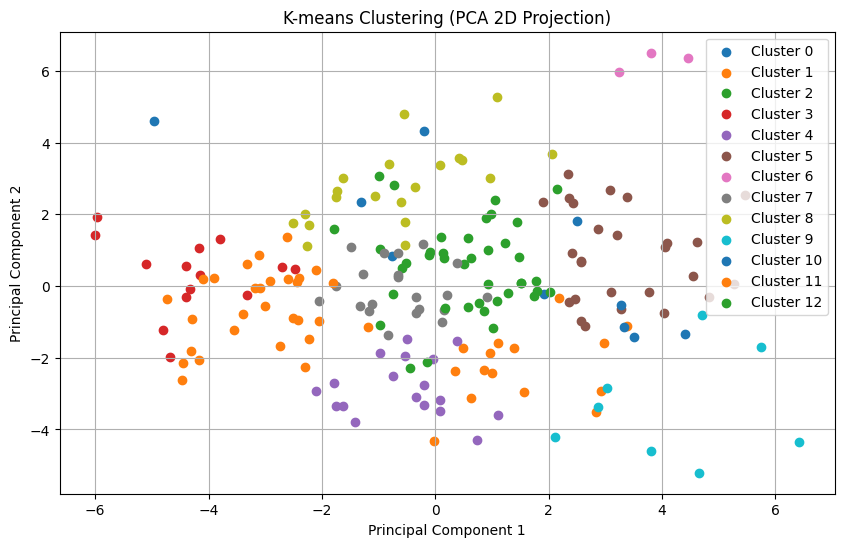

Cluster        0         1         2         3         4         5         6   \
Min     -0.178323  0.759080 -0.543243  0.463163 -0.041167  0.542454  1.096835   
90s     -0.169052  0.756120 -0.543134  0.463313 -0.043681  0.540888  1.100729   
Goals    1.299245 -0.420877 -0.396923  0.854633  0.975746 -0.407491 -0.474421   
Shots    1.302994 -0.310206 -0.102364  0.911092  0.881082 -0.599171 -0.814371   
SoT      1.666205 -0.508688 -0.089091  0.650165  0.974532 -0.612812 -0.694858   
...           ...       ...       ...       ...       ...       ...       ...   
OG      -0.210476  0.314311  0.053173 -0.210476 -0.210476  0.092286 -0.210476   
Recov   -0.810738  0.427381 -0.081468 -1.323077 -0.426701  1.195408  0.614000   
AerWon   2.470842 -0.264679 -0.337584  0.183881 -0.730284  0.123274  1.222775   
AerLost  2.688225 -0.428039  0.133575  1.427134 -0.849851 -0.431559  0.525851   
AerWon%  0.261321  0.248411 -0.518632 -0.693329 -0.023136  0.810204  0.643149   

Cluster        7         8 

In [206]:
optimal_clusters = 13

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(mid_reduced)


midfielders['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    cluster_points = mid_reduced[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering (PCA 2D Projection)')
plt.legend()
plt.grid()
plt.show()

# Analyze the composition of each cluster
cluster_summary = midfielders.groupby('Cluster').mean().T
print(cluster_summary)



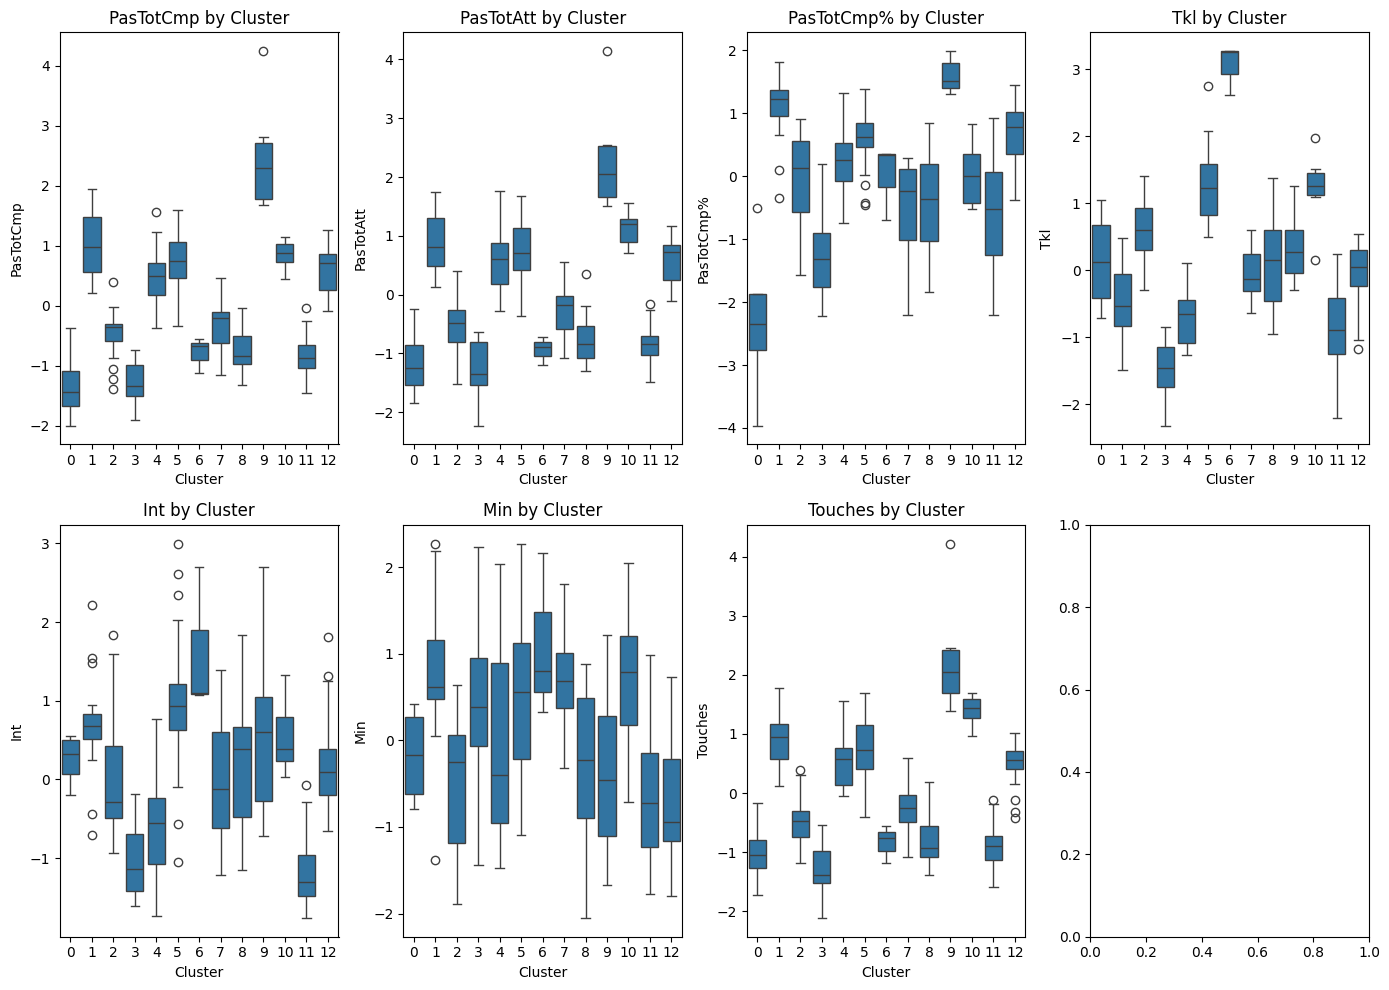

In [207]:
# Let's visualize the cluster composition for key features
fig, axes = plt.subplots(2, 4, figsize=(14, 10))
axes = axes.flatten()

# Plot each feature in a subplot
for i, feature in enumerate(jorginho_features):
    sns.boxplot(x='Cluster', y=feature, data=midfielders, ax=axes[i])
    axes[i].set_title(f'{feature} by Cluster')

plt.tight_layout()
plt.show()

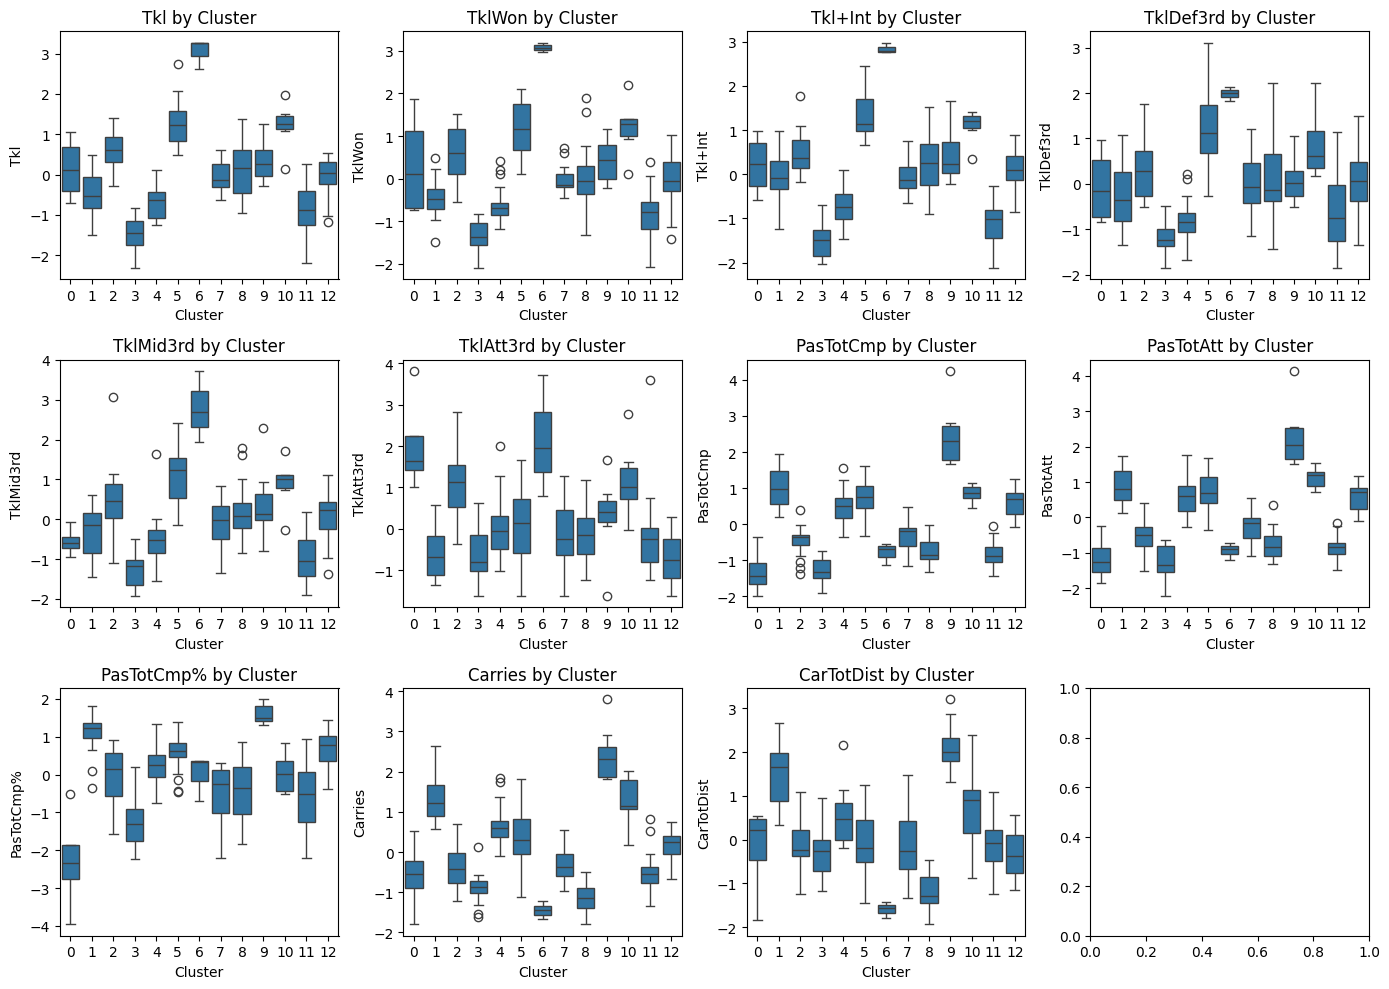

In [208]:
# Let's visualize the cluster composition for key features
fig, axes = plt.subplots(3, 4, figsize=(14, 10))
axes = axes.flatten()

# Plot each feature in a subplot
for i, feature in enumerate(partey_features):
    sns.boxplot(x='Cluster', y=feature, data=midfielders, ax=axes[i])
    axes[i].set_title(f'{feature} by Cluster')

plt.tight_layout()
plt.show()

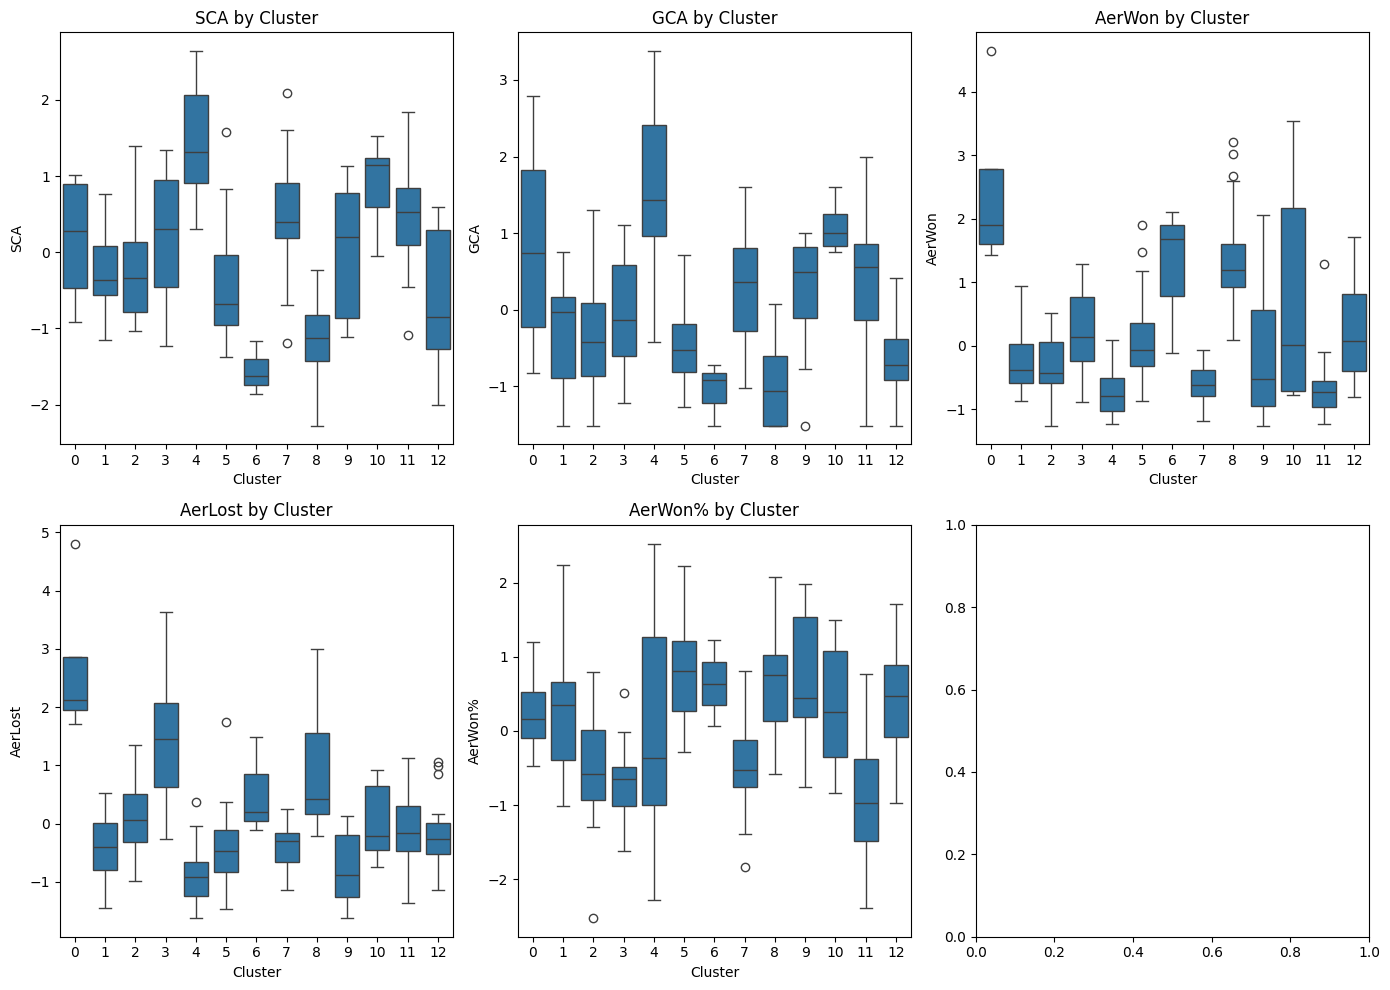

In [209]:
# Let's visualize the cluster composition for key features
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
axes = axes.flatten()

# Plot each feature in a subplot
for i, feature in enumerate(additional_features):
    sns.boxplot(x='Cluster', y=feature, data=midfielders, ax=axes[i])
    axes[i].set_title(f'{feature} by Cluster')

plt.tight_layout()
plt.show()

## 5.1  Euclidian Distance for Ranking <a class="anchor" id="KM_DIST"></a>
So normally I will search the players that ressemble Partey or Jorginho but after data preprocessing and filtering, both players has been dropped. Lets search the player like Rodri who is world class.


In [210]:
rodri_idx = midfielders_names[midfielders_names == "Rodri"].index[0] #Find the index
rodri_vector = midfielders.iloc[rodri_idx, :].values.reshape(1, -1) #extranct the feature's vector
distances = pairwise_distances(midfielders, rodri_vector, metric='euclidean').flatten() #Calculate eucladian distance
midfielders_full['Distance_to_Rodri'] = distances
similar_players = midfielders_full.sort_values(by='Distance_to_Rodri')

print(similar_players[['Player', 'Distance_to_Rodri']].head(5))

                  Player  Distance_to_Rodri
159                Rodri       4.129531e-07
82       Frenkie de Jong       1.140635e+01
184  Aurélien Tchouaméni       1.167481e+01
9         Sofyan Amrabat       1.226357e+01
193              Vitinha       1.241673e+01


**Remark**: Les't see Rodri is in which cluster and compare the players above to the players in the cluster.

In [211]:
rodri_cluster = kmeans.labels_[rodri_idx] #Locate the cluster of Rodri
rodri_cluster

9

In [212]:
rodri_centroid = kmeans.cluster_centers_[rodri_cluster]

midfielders_full['DistanceToCentroid'] = [
    euclidean(mid_reduced[i], rodri_centroid) if kmeans.labels_[i] == rodri_cluster else float('inf')
    for i in range(len(midfielders))
]
similar_players = midfielders_full[midfielders_full['DistanceToCentroid'] != float('inf')].sort_values(by='DistanceToCentroid')

similar_players = similar_players[similar_players['Player'] != 'Rodri']
similar_players

Rk               Player Nation   Pos        Squad     Comp  Age  Born  \
82   1215      Frenkie de Jong    NED    MF    Barcelona  La Liga   25  1997   
193  2566              Vitinha    POR    MF    Paris S-G  Ligue 1   22  2000   
9      91       Sofyan Amrabat    MAR    MF   Fiorentina  Serie A   26  1996   
69   1067        Achraf Hakimi    MAR  DFMF    Paris S-G  Ligue 1   24  1998   
96   1421      Johann Lepenant    FRA    MF         Lyon  Ligue 1   20  2002   
140  1921                Pedri    ESP  MFFW    Barcelona  La Liga   20  2002   
184  2407  Aurélien Tchouaméni    FRA    MF  Real Madrid  La Liga   23  2000   

     MP  Starts  ...  TklW  PKwon  PKcon   OG  Recov  AerWon  AerLost  \
82   18      14  ...  0.97    0.0    0.0  0.0   6.90    0.62     0.55   
193  21      17  ...  0.98    0.0    0.0  0.0   7.19    0.20     0.07   
9    18      14  ...  1.16    0.0    0.0  0.0   7.36    0.54     0.54   
69   21      16  ...  1.43    0.0    0.0  0.0   5.60    0.30     0.36   
96   17      13  ...  1.65    0.0    0.0  0.0   8.65    1.05     1.13   
140  20      17  ...  1.11    0.0    0.0  0.0   6.26    0.06     0.12   
184  16      13  ...  1.53    0.0    0.0  0.0   5.00    2.29     0.93   

     AerWon%  Distance_to_Rodri  DistanceToCentroid  
82      52.9          11.406351            1.708223  
193     75.0          12.416733            2.734922  
9       50.0          12.263569            2.799673  
69      45.5          17.073105            2.833292  
96      48.3          13.708173            2.982542  
140     33.3          13.202154            3.128659  
184     71.1          11.674814            4.665221  

[7 rows x 126 columns]

In [213]:
similar_players[['Player', 'DistanceToCentroid']]

Player  DistanceToCentroid
82       Frenkie de Jong            1.708223
193              Vitinha            2.734922
9         Sofyan Amrabat            2.799673
69         Achraf Hakimi            2.833292
96       Johann Lepenant            2.982542
140                Pedri            3.128659
184  Aurélien Tchouaméni            4.665221

# 6. DBSCAN <a class="anchor" id="DBSCAN"></a>

In [214]:
best_eps = 0
best_min_samples = 0
best_silhouette = -1

eps_values = np.arange(0.001, 10.0, 0.001)
min_samples_values = np.arange(1, 10, 1)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(mid_reduced)
        
        # Check the number of unique labels (clusters)
        unique_labels = set(dbscan_labels)
        num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

        # Proceed only if there are at least 2 clusters and not too many clusters
        if 2 <= num_clusters <= 20:
            silhouette_avg = silhouette_score(mid_reduced, dbscan_labels)
            if silhouette_avg > best_silhouette:
                best_eps = eps
                best_min_samples = min_samples
                best_silhouette = silhouette_avg

print(f'Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best silhouette score: {best_silhouette}')

# Apply DBSCAN with best parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(mid_reduced)

# Add the DBSCAN labels to the DataFrame
midfielders_full['DBSCAN_Cluster'] = dbscan_labels

# Print the number of clusters found (excluding noise)
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f'Number of clusters found: {num_clusters}')

Best eps: 4.7010000000000005, Best min_samples: 1, Best silhouette score: 0.38335513842980856
Number of clusters found: 2


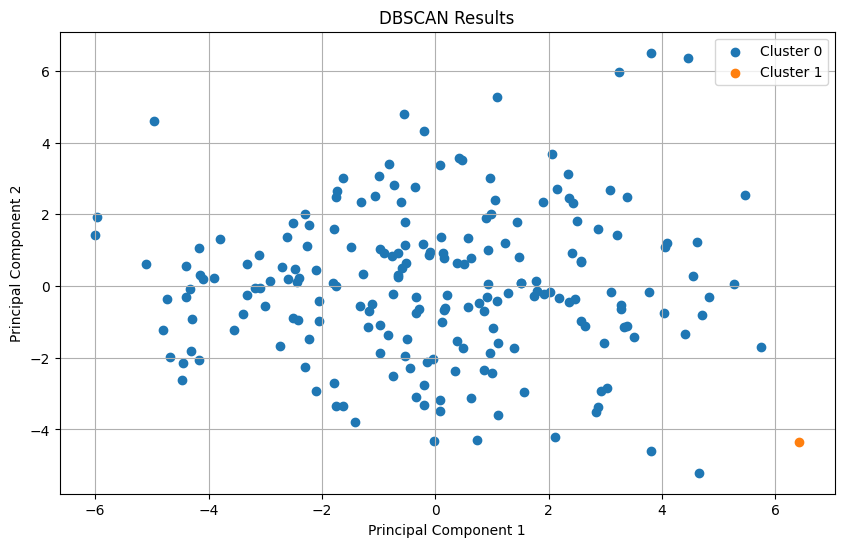

In [215]:
plt.figure(figsize=(10, 6))
unique_clusters = np.unique(dbscan_labels)

for cluster in unique_clusters:
    cluster_data = mid_reduced[dbscan_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

# Customize plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Results')
plt.legend()
plt.grid(True)
plt.show()

**Remark** : In this case, I tried to search the best epsilon and min samples but it still give only two clusters, maybe becaus of this data is high dimensional. 

# 7. Mean Shift Clustering <a class="anchor" id="MEANSHIFT"></a>

In [216]:
bandwidth = estimate_bandwidth(mid_reduced, quantile=0.2)
mean_shift = MeanShift(bandwidth=bandwidth)
mean_shift_labels = mean_shift.fit_predict(mid_reduced)

midfielders_full['Cluster'] = mean_shift_labels



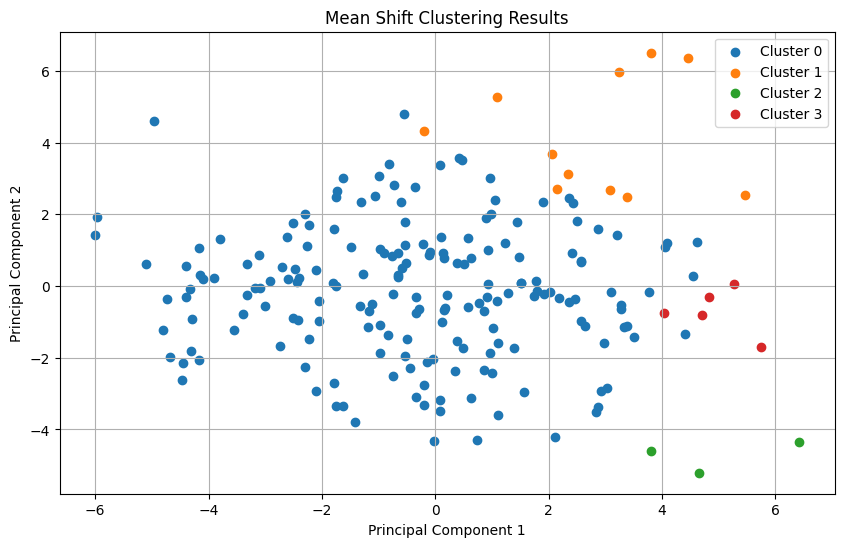

In [217]:
plt.figure(figsize=(10, 6))
unique_clusters = np.unique(mean_shift_labels)

for cluster in unique_clusters:
    cluster_data = mid_reduced[mean_shift_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

# Customize plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Mean Shift Clustering Results')
plt.legend()
plt.grid(True)
plt.show()



## 7.1 Analysis of Mean Shift Clustering <a class="anchor" id="MEAN_ANAL"></a>

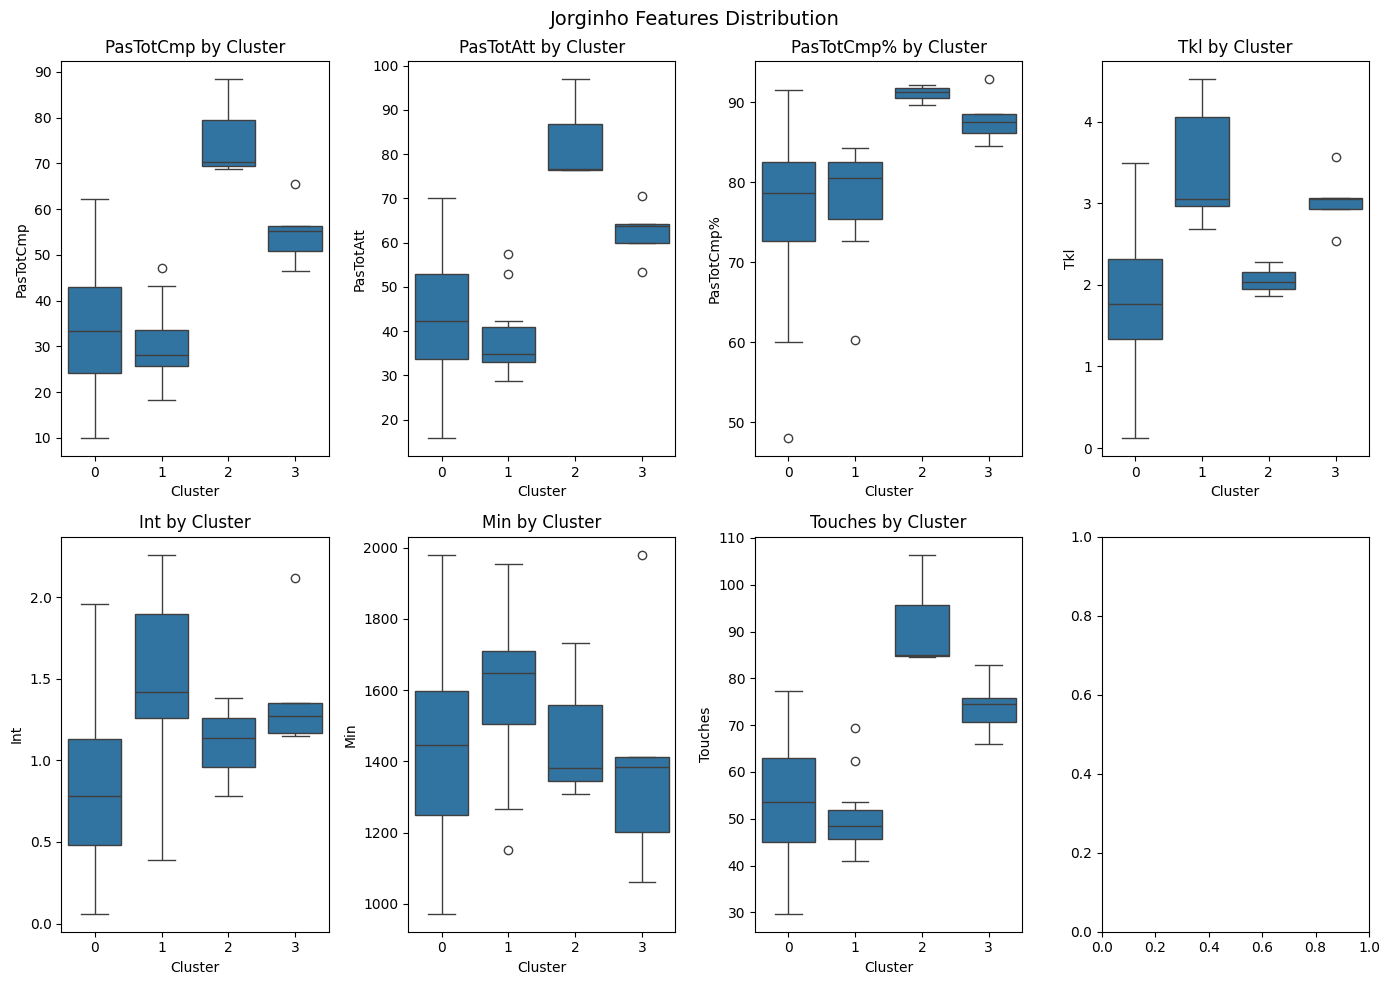

In [218]:
# Let's visualize the cluster composition for key features
fig, axes = plt.subplots(2, 4, figsize=(14, 10))
axes = axes.flatten()
plt.suptitle('Jorginho Features Distribution', fontsize=14)
# Plot each feature in a subplot
for i, feature in enumerate(jorginho_features):
    sns.boxplot(x='Cluster', y=feature, data=midfielders_full, ax=axes[i])
    axes[i].set_title(f'{feature} by Cluster')

plt.tight_layout()
plt.show()

**Remarks:** I can conclude that the players in Cluster 2 are the magician, who is specialize in passing and creating chances.

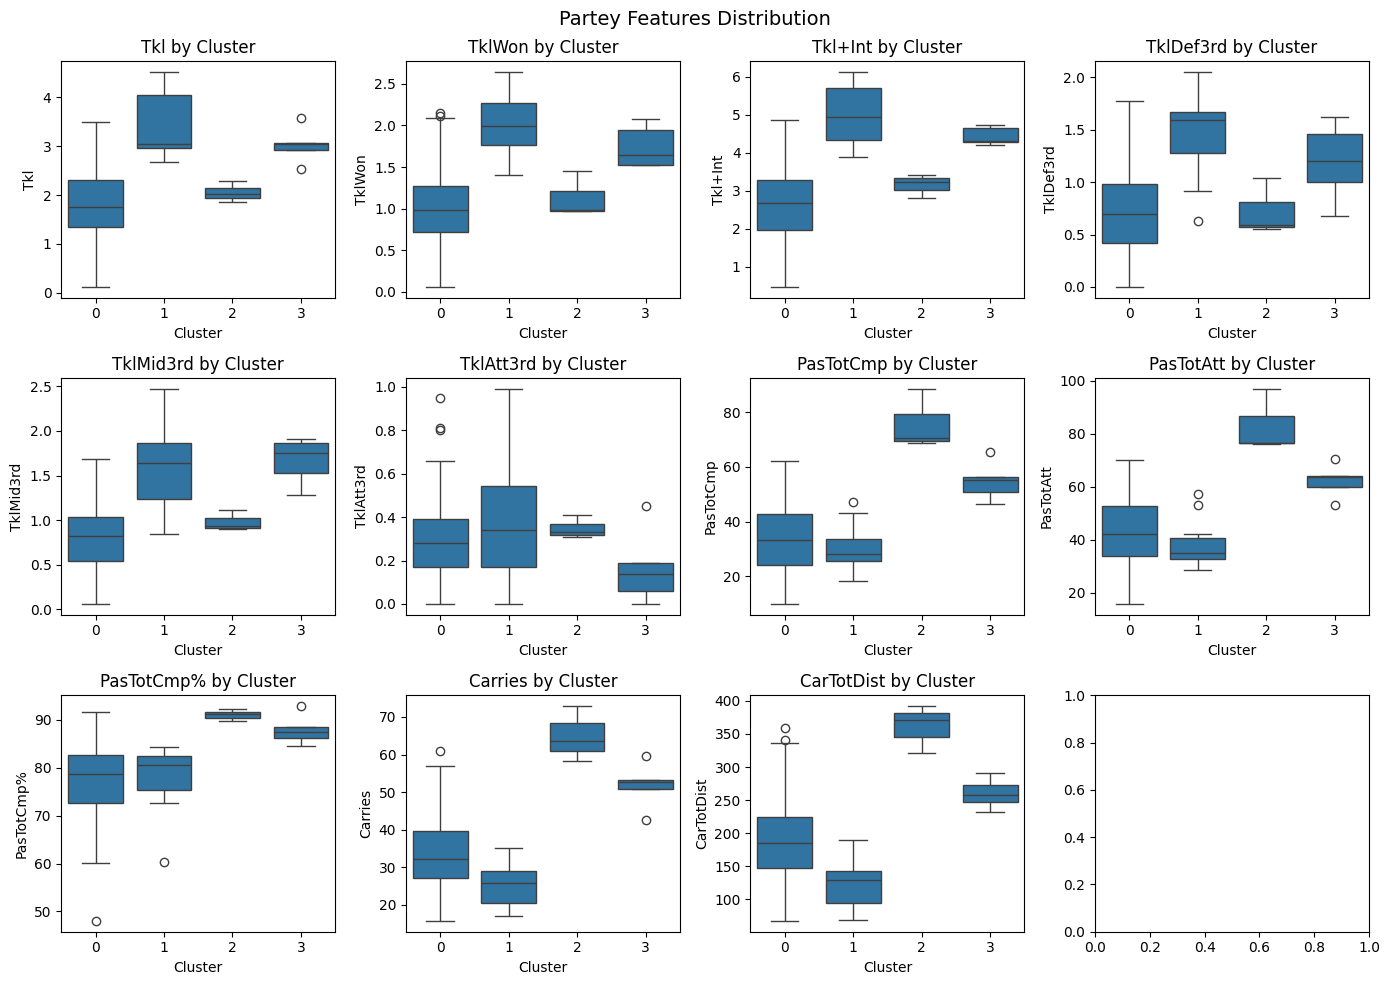

In [219]:
# Let's visualize the cluster composition for key features
fig, axes = plt.subplots(3, 4, figsize=(14, 10))
axes = axes.flatten()
plt.suptitle('Partey Features Distribution', fontsize=14)

# Plot each feature in a subplot
for i, feature in enumerate(partey_features):
    sns.boxplot(x='Cluster', y=feature, data=midfielders_full, ax=axes[i])
    axes[i].set_title(f'{feature} by Cluster')

plt.tight_layout()

plt.show()

**Remarks:**  PLayers in the cluster 1 is more defensive mindset based on tackels contribution

In [220]:
cluster_1_players = midfielders_full[mean_shift_labels == 1]['Player']

print(f"Players in Cluster 1:")
print(cluster_1_players.tolist()) 

Players in Cluster 1:
['Tyler Adams', 'Cyrille Bayala', 'Mahdi Camara', 'Bryan Cristante', 'Cheick Doucouré', 'Morten Hjulmand', 'Tom Krauß', 'Amadou Onana', 'João Palhinha', 'Tomá\x9a Sou?ek', 'Vinicius Souza']


In [221]:
cluster_2_players = midfielders_full[mean_shift_labels == 2]['Player']

print(f"Players in Cluster 2:")
print(cluster_2_players.tolist())  

Players in Cluster 2:
['Frenkie de Jong', 'Rodri', 'Vitinha']


In [222]:
cluster_3_players = midfielders_full[mean_shift_labels == 3]['Player']

print(f"Players in Cluster 3:")
print(cluster_3_players.tolist())  

Players in Cluster 3:
['Ismaël Bennacer', 'Mohamed Camara', 'Johann Lepenant', 'Stijn Spierings', 'Aurélien Tchouaméni']


## 8. Conclusion <a class="anchor" id="CONCL"></a>

**Model Chosen** : K-Means

**Reason** : It is easier to handle thanks to the hyperparameter of number of clusters, the data is not so big because we only choose the top 5 leagues but the rare gems are hidden in other leagues like Martinelli from 3=-rd division brawzil league so K-Means clustering is the best when come to efficiency and speed.

**Future action** : Fine-tuning the hyper-parameter, increase the number of leagues,explore other ways to reduce the dimensions other than PCA like nmf.
